In [1]:
pip install pymatgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 9.3 MB/s eta 0:00:00


#**Predictive Models for formation energy: Binary Compaunds, Ternery Compounds, and Hybrid Models**

Here, my goal will be to use machine learn to build several models to predict formation energy of compounds, and wether they are a metal or an insulator. Furthermore, I will be preforming this utilizing three different types of datasets: one involving binary compountds with 2 unique elements, one involving ternery compounds with 3 unique elements, and a hybrid set with a mixed data set of compounds.

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.ext.matproj import MPRester



my_api= "J03EG0bzX4u1GI3dyaLrLFsz2zwNbju3"

First I need to pull some material properties from a database. I will not limit myself by element, except to eliminate artifical designer elements, where low amount of data on these exist. (These aslo tend to not be very stable anyways). After picking  bunch of features, some were dropped due to small data sample of those feauteres. For example, of the 1020 materials, only 25 had weighted_work_function so filling in thi data with null values would not be of much use, so did not grab this feature from the database. I pick compounds with both 2 and 3 unique species.

In [70]:
exclude_elements =  ["Np","Pu","Am","Cm","Bk","Cf","Es","Fm", "Md", "No", "Lr", "Rf", "Db", "Sg", "Bh", "Hs", "Mt", "Ds", "Rg", "Cn", "Nh", "Fl", "Mc", "Lv", "Ts", "Og"]
with MPRester(my_api) as mpr:
  docs = mpr.summary.search(num_elements = [],
    exclude_elements = exclude_elements,
    is_stable=True,
    num_sites = [2,3],
    fields=["material_id",
    "band_gap", "formation_energy_per_atom",
    "density_atomic","formula_pretty",
    "is_magnetic","total_magnetization","theoretical",
    "volume","energy_above_hull","symmetry","structure","efermi"])

/usr/local/lib/python3.10/dist-packages/mp_api/client/mprester.py:182: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


Retrieving SummaryDoc documents:   0%|          | 0/1020 [00:00<?, ?it/s]

Now, I will pass my results from my search into a dictionary that I then convert into a dataframe

In [71]:
D2={"material_id":[],"band_gap":[],"formation_energy_per_atom":[],"density_atomic":[],"formula_pretty":[],"is_magnetic":[],
    "total_magnetization":[],"theoretical":[],
    "volume":[],"energy_above_hull":[],"symmetry":[],"structure":[],"efermi":[]}

#D2 = pd.DataFrame(D)
for doc in docs:
  D2["material_id"].append(doc.material_id)
  D2["band_gap"].append(doc.band_gap)
  D2["formation_energy_per_atom"].append(doc.formation_energy_per_atom)
  D2["density_atomic"].append(doc.density_atomic)
  D2["formula_pretty"].append(doc.formula_pretty)
  D2["is_magnetic"].append(doc.is_magnetic)
  D2["total_magnetization"].append(doc.total_magnetization)
  D2["theoretical"].append(doc.theoretical)
  D2["volume"].append(doc.volume)
  D2["energy_above_hull"].append(doc.energy_above_hull)
  D2["symmetry"].append(doc.symmetry)
  D2["structure"].append(doc.structure)
  D2["efermi"].append(doc.efermi)
mp_query2 = pd.DataFrame(D2)

In [72]:
mp_query2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                1020 non-null   object 
 1   band_gap                   1020 non-null   float64
 2   formation_energy_per_atom  1020 non-null   float64
 3   density_atomic             1020 non-null   float64
 4   formula_pretty             1020 non-null   object 
 5   is_magnetic                1020 non-null   bool   
 6   total_magnetization        1020 non-null   float64
 7   theoretical                1020 non-null   bool   
 8   volume                     1020 non-null   float64
 9   energy_above_hull          1020 non-null   float64
 10  symmetry                   1020 non-null   object 
 11  structure                  1020 non-null   object 
 12  efermi                     1020 non-null   float64
dtypes: bool(2), float64(7), object(4)
memory usage: 

Next, I need to engineer some new features into my data. To do this, I start with some features of the consituent elements. I pass these into a seperate data frame and can use these to generate new features, such as the compositon averaged densisty and total number of electrons

In [73]:
element_df = pd.read_csv('periodic_table_final.csv')

In [74]:
element_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         118 non-null    int64  
 1   AtomicNumber       118 non-null    float64
 2   Element            118 non-null    object 
 3   Symbol             118 non-null    object 
 4   AtomicMass         118 non-null    float64
 5   NumberofNeutrons   118 non-null    float64
 6   NumberofProtons    118 non-null    float64
 7   NumberofElectrons  118 non-null    float64
 8   Period             118 non-null    float64
 9   Group              90 non-null     float64
 10  Phase              118 non-null    object 
 11  Natural            90 non-null     object 
 12  Metal              92 non-null     object 
 13  Nonmetal           19 non-null     object 
 14  Metalloid          7 non-null      object 
 15  Type               115 non-null    object 
 16  AtomicRadius       92 non-

In [75]:
element_df.set_index("Symbol", inplace=True)

To engineer these features, I sert up a loop that gets the number of unique elements and there compositonal weight. I can use these in combinaiton with each opther to generate both composition averaged features(sum over the weights) or compositon total features(sum of the features, unweighted). Doing this, I generate the following features:
compsoiton everaged atomic radiuds
composition averaged mass
compositiona veraged radius^2
composition averaged radius^3
total mass
total number of electrons, protons, and nuetrons
total(sum) of radius^2
total(sum) of radius^3

In [76]:
from pymatgen.core import Composition

mp_query2["comp_ave_rad"]=0
for i in range(len(mp_query2["formula_pretty"])):
  comp_ave_rad=0
  comp = Composition(mp_query2["formula_pretty"][i])
  elem = comp.elements # this will give you the elements
  elem2 = np.array(elem, dtype=str)
  for j in elem2:
    frac = comp.get_atomic_fraction(j)
    comp_ave_rad = element_df.loc[j]["AtomicRadius"]*frac + comp_ave_rad
  mp_query2["comp_ave_rad"][i]=comp_ave_rad




<ipython-input-76-cfdf34588b1f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query2["comp_ave_rad"][i]=comp_ave_rad


In [77]:
mp_query2["comp_ave_mass"]=0
for i in range(len(mp_query2["formula_pretty"])):
  comp_ave_rad=0
  comp = Composition(mp_query2["formula_pretty"][i])
  elem = comp.elements # this will give you the elements
  elem2 = np.array(elem, dtype=str)
  for j in elem2:
    frac = comp.get_atomic_fraction(j)
    comp_ave_rad = element_df.loc[j]["AtomicMass"]*frac + comp_ave_rad
  mp_query2["comp_ave_mass"][i]=comp_ave_rad


<ipython-input-77-d8140bf1caca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query2["comp_ave_mass"][i]=comp_ave_rad


In [78]:
mp_query2["NumberofNeutrons"]=0
for i in range(len(mp_query2["formula_pretty"])):
  comp_ave_rad=0
  comp = Composition(mp_query2["formula_pretty"][i])
  elem = comp.elements # this will give you the elements
  elem2 = np.array(elem, dtype=str)
  for j in elem2:
    frac = comp.get_atomic_fraction(j)*comp.num_atoms
    comp_ave_rad = element_df.loc[j]["NumberofNeutrons"]*frac + comp_ave_rad
  mp_query2["NumberofNeutrons"][i]=comp_ave_rad

  mp_query2["NumberofProtons"]=0
for i in range(len(mp_query2["formula_pretty"])):
  comp_ave_rad=0
  comp = Composition(mp_query2["formula_pretty"][i])
  elem = comp.elements # this will give you the elements
  elem2 = np.array(elem, dtype=str)
  for j in elem2:
    frac = comp.get_atomic_fraction(j)*comp.num_atoms
    comp_ave_rad = element_df.loc[j]["NumberofProtons"]*frac + comp_ave_rad
  mp_query2["NumberofProtons"][i]=comp_ave_rad

  mp_query2["NumberofElectrons"]=0
for i in range(len(mp_query2["formula_pretty"])):
  comp_ave_rad=0
  comp = Composition(mp_query2["formula_pretty"][i])
  elem = comp.elements # this will give you the elements
  elem2 = np.array(elem, dtype=str)
  for j in elem2:
    frac = comp.get_atomic_fraction(j)*comp.num_atoms
    comp_ave_rad = element_df.loc[j]["NumberofElectrons"]*frac + comp_ave_rad
  mp_query2["NumberofElectrons"][i]=comp_ave_rad

<ipython-input-78-1ea991c5ec56>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query2["NumberofNeutrons"][i]=comp_ave_rad
<ipython-input-78-1ea991c5ec56>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query2["NumberofNeutrons"][i]=comp_ave_rad
<ipython-input-78-1ea991c5ec56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query2["NumberofProtons"][i]=comp_ave_rad
<ipython-input-78-1ea991c5ec56>:21: SettingWithCopyWarni

In [79]:
mp_query2["comp_ave_area"]=0
for i in range(len(mp_query2["formula_pretty"])):
  comp_ave_rad=0
  comp = Composition(mp_query2["formula_pretty"][i])
  elem = comp.elements # this will give you the elements
  elem2 = np.array(elem, dtype=str)
  for j in elem2:
    frac = comp.get_atomic_fraction(j)
    comp_ave_rad = element_df.loc[j]["AtomicRadius"]*element_df.loc[j]["AtomicRadius"]*frac + comp_ave_rad
  mp_query2["comp_ave_area"][i]=comp_ave_rad

mp_query2["comp_ave_vol"]=0
for i in range(len(mp_query2["formula_pretty"])):
   comp_ave_rad=0
   comp = Composition(mp_query2["formula_pretty"][i])
   elem = comp.elements # this will give you the elements
   elem2 = np.array(elem, dtype=str)
   for j in elem2:
     frac = comp.get_atomic_fraction(j)
     comp_ave_rad = element_df.loc[j]["AtomicRadius"]*element_df.loc[j]["AtomicRadius"]*element_df.loc[j]["AtomicRadius"]*frac + comp_ave_rad
   mp_query2["comp_ave_vol"][i]=comp_ave_rad

mp_query2["tot_mass"]=0
for i in range(len(mp_query2["formula_pretty"])):
   comp_ave_rad=0
   comp = Composition(mp_query2["formula_pretty"][i])
   elem = comp.elements # this will give you the elements
   elem2 = np.array(elem, dtype=str)
   for j in elem2:
     frac = comp.get_atomic_fraction(j)*comp.num_atoms
     comp_ave_rad = element_df.loc[j]["AtomicMass"]*frac + comp_ave_rad
   mp_query2["tot_mass"][i]=comp_ave_rad


   mp_query2["tot_area"]=0
for i in range(len(mp_query2["formula_pretty"])):
   comp_ave_rad=0
   comp = Composition(mp_query2["formula_pretty"][i])
   elem = comp.elements # this will give you the elements
   elem2 = np.array(elem, dtype=str)
   for j in elem2:
     frac = comp.get_atomic_fraction(j)*comp.num_atoms
     comp_ave_rad = element_df.loc[j]["AtomicRadius"]*element_df.loc[j]["AtomicRadius"]*frac + comp_ave_rad
   mp_query2["tot_area"][i]=comp_ave_rad

   mp_query2["tot_vol"]=0
for i in range(len(mp_query2["formula_pretty"])):
   comp_ave_rad=0
   comp = Composition(mp_query2["formula_pretty"][i])
   elem = comp.elements # this will give you the elements
   elem2 = np.array(elem, dtype=str)
   for j in elem2:
     frac = comp.get_atomic_fraction(j)*comp.num_atoms
     comp_ave_rad = element_df.loc[j]["AtomicRadius"]*element_df.loc[j]["AtomicRadius"]*element_df.loc[j]["AtomicRadius"]*frac + comp_ave_rad
   mp_query2["tot_vol"][i]=comp_ave_rad

<ipython-input-79-a3de60ee7979>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query2["comp_ave_area"][i]=comp_ave_rad
<ipython-input-79-a3de60ee7979>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query2["comp_ave_vol"][i]=comp_ave_rad
<ipython-input-79-a3de60ee7979>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query2["tot_mass"][i]=comp_ave_rad
<ipython-input-79-a3de60ee7979>:32: SettingWithCopyWarning: 
A value i

In [80]:
mp_query2["comp_ave_mass"]=0
for i in range(len(mp_query2["formula_pretty"])):
   comp_ave_rad=0
   comp = Composition(mp_query2["formula_pretty"][i])
   elem = comp.elements # this will give you the elements
   elem2 = np.array(elem, dtype=str)
   for j in elem2:
     frac = comp.get_atomic_fraction(j)
     comp_ave_rad = element_df.loc[j]["AtomicMass"]*frac + comp_ave_rad
   mp_query2["comp_ave_mass"][i]=comp_ave_rad

<ipython-input-80-c28d26386bc6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query2["comp_ave_mass"][i]=comp_ave_rad


In [81]:
mp_query2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                1020 non-null   object 
 1   band_gap                   1020 non-null   float64
 2   formation_energy_per_atom  1020 non-null   float64
 3   density_atomic             1020 non-null   float64
 4   formula_pretty             1020 non-null   object 
 5   is_magnetic                1020 non-null   bool   
 6   total_magnetization        1020 non-null   float64
 7   theoretical                1020 non-null   bool   
 8   volume                     1020 non-null   float64
 9   energy_above_hull          1020 non-null   float64
 10  symmetry                   1020 non-null   object 
 11  structure                  1020 non-null   object 
 12  efermi                     1020 non-null   float64
 13  comp_ave_rad               1020 non-null   float

#**Hybrid Linear Regression Model to predict Formation Energy**

I now can pass my data into 2 sets for the purpose of training my models. I will need to drop non-numerical features for the set of labeled data. I will also need to not include the formation energy as that is what we are predicting. Then I will need my value set to be the formaiton energy.

In [82]:
x_formation = mp_query2.drop(["material_id","formula_pretty","is_magnetic","theoretical","symmetry","structure","formation_energy_per_atom"],axis=1).copy()
y_formation = mp_query2["formation_energy_per_atom"].copy()

In [83]:
x_formation.columns


Index(['band_gap', 'density_atomic', 'total_magnetization', 'volume',
       'energy_above_hull', 'efermi', 'comp_ave_rad', 'comp_ave_mass',
       'NumberofNeutrons', 'NumberofProtons', 'NumberofElectrons',
       'comp_ave_area', 'comp_ave_vol', 'tot_mass', 'tot_area', 'tot_vol'],
      dtype='object')

In [84]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict, KFold



To detirmine formation energy, I will be using a cross validated linear regression model and then use a LASSO model to further optimize

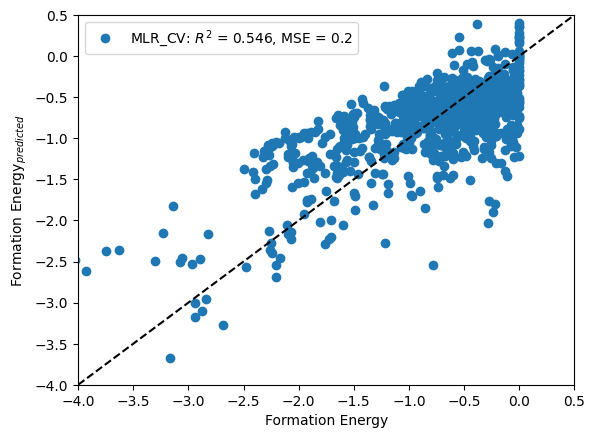

In [85]:
kfold = KFold(n_splits=10, shuffle=True, random_state=16)
reg_cv = linear_model.LinearRegression()
ypred_cv = cross_val_predict(reg_cv, x_formation, y_formation, cv=kfold)
r2_cv = r2_score(y_formation, ypred_cv)
mse_cv = mean_squared_error(y_formation, ypred_cv)
label_cv = "MLR_CV: $R^2$ = %.3f, MSE = %.1f" % (r2_cv, mse_cv)
#equation = ["%.2e %s" % (v, f) for v, f in zip(reg_cv.coef_, x_formation.columns)]
#print("K = %.1f + %s" % (reg.intercept_, " + ".join(equation)))
plt.plot(y_formation, ypred_cv, "o", label=label_cv)
plt.ylabel(r"Formation Energy$_{predicted}$")
plt.xlabel(r"Formation Energy")
plt.legend()
plt.xlim([-4, 0.5])
plt.ylim([-4, 0.5])
plt.plot([-4, 0.5], [-4, 0.5], "k--");

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_formation)
means_ = scaler.mean_
stds_ = scaler.scale_
z_formation = scaler.transform(x_formation)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.315e+01, tolerance: 5.192e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.539e+01, tolerance: 4.643e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.361e+01, tolerance: 4.499e

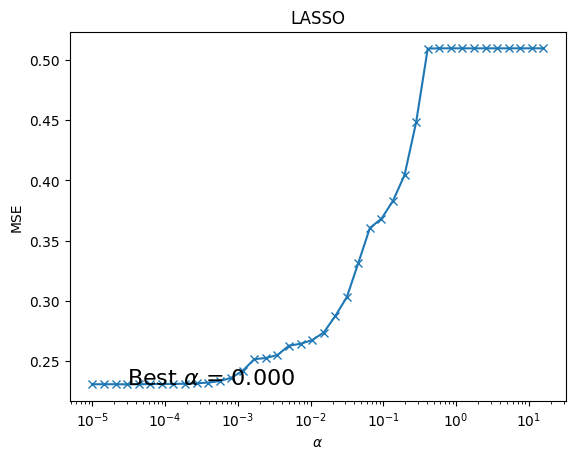

In [87]:
from sklearn.model_selection import cross_validate
alphas = np.logspace(-5, 1.2, 40)
cv_results = []
coeffs = []
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(z_formation, y_formation)
    scores = cross_validate(lasso, z_formation, y_formation, cv=kfold, scoring="neg_mean_squared_error")
    cv_results.append([alpha, -np.mean(scores["test_score"])] + list(lasso.coef_))
features = ["band_gap","density_atomic","total_magnetization","volume","energy_above_hull",
            "efermi","comp_ave_rad","comp_ave_mass","NumberofNeutrons","NumberofProtons",
            "NumberofElectrons","comp_ave_area","comp_ave_vol","tot_mass","tot_area","tot_vol"]
cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features)
plt.plot(cv_results["alpha"], cv_results["score"], "-x")
#plt.xlim([1e-2, 10**1.2])
#plt.ylim((3700, 4500))
plt.xscale("log")
plt.xlabel(r"$\alpha$")
plt.ylabel("MSE")
plt.title("LASSO")
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % best_alpha,
    (best_alpha, cv_results["score"].min()),
    fontsize=16,
);

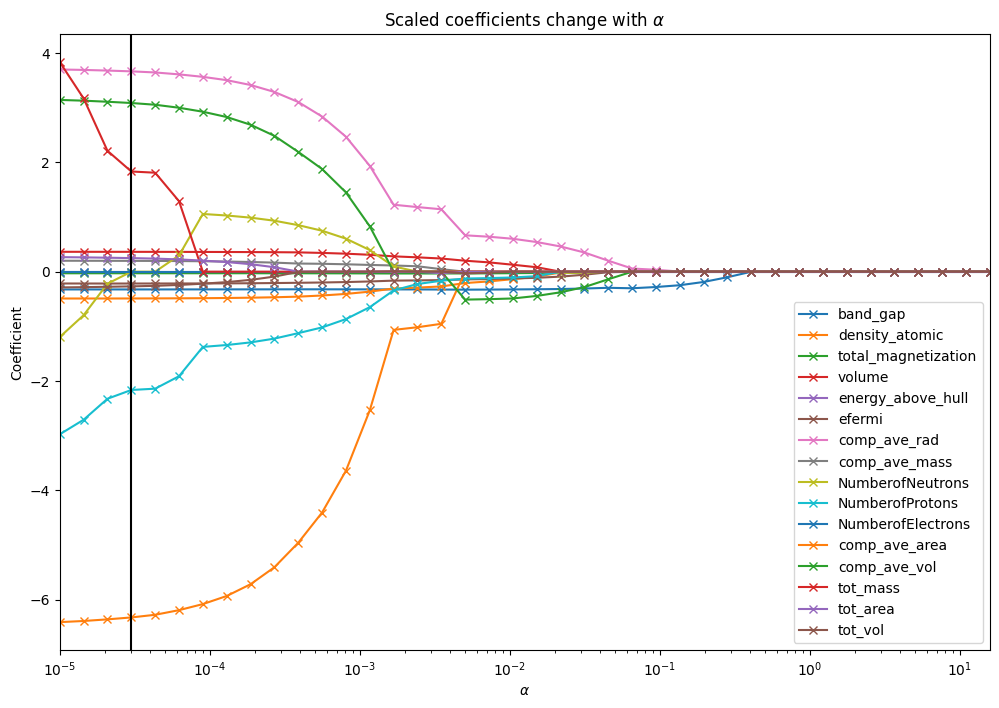

In [88]:
f, ax = plt.subplots(figsize=(12, 8))
for f in features:
    plt.plot(cv_results["alpha"], cv_results[f], "-x", label=f)
    plt.xscale("log")
    plt.xlabel(r"$\alpha$")
    plt.ylabel("Coefficient")
    plt.title(r"Scaled coefficients change with $\alpha$")
plt.legend()
plt.axvline(x = best_alpha, color = 'black')
plt.xlim([1e-5, 10**1.2]);

Scaling coefficents show that best alpha happen at 10^-4. By setting a "best_alpha" variable, I can autoamtically pass this value into my LASSO model.

In [89]:
reg = linear_model.Lasso(alpha=best_alpha, max_iter=1000)
reg.fit(x_formation, y_formation)
real_coef = reg.coef_ / stds_  # convert back to unnormalized inputs
real_interp = reg.intercept_ - means_.dot(real_coef)  # convert back to unnormalized inputs
equation = ["%.2e %s" % (v, f) for v, f in zip(real_coef, features) if abs(v) > 1e-4]
print("K = %.1f + %s" % (real_interp, " + ".join(equation)))

K = -48.2 + -3.02e-01 band_gap + -7.16e-03 density_atomic + -1.04e-02 total_magnetization + 7.72e-04 volume + -3.32e-02 efermi + 2.96e+01 comp_ave_rad + -7.69e-04 NumberofProtons + -3.40e+00 comp_ave_area + 1.38e-01 comp_ave_vol + 1.25e-04 tot_mass + -1.92e-04 tot_area


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.172e+02, tolerance: 5.192e-02
  model = cd_fast.enet_coordinate_descent(


By plotting the scaled equation of dependencies, we see that the important features are the composition averaged radius, followed by the compositon averaged radius^2. The composition averaged mass was 4 order of magnitude less important. This indicates a greater improtance in the amount of space the compound takes up than the mass of teh constituents. This makes sense for molecular consideration, as this data set has only stable elements from the get go.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.584e+00, tolerance: 4.643e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.360e+00, tolerance: 4.499e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.698e-01, tolerance: 4.498e

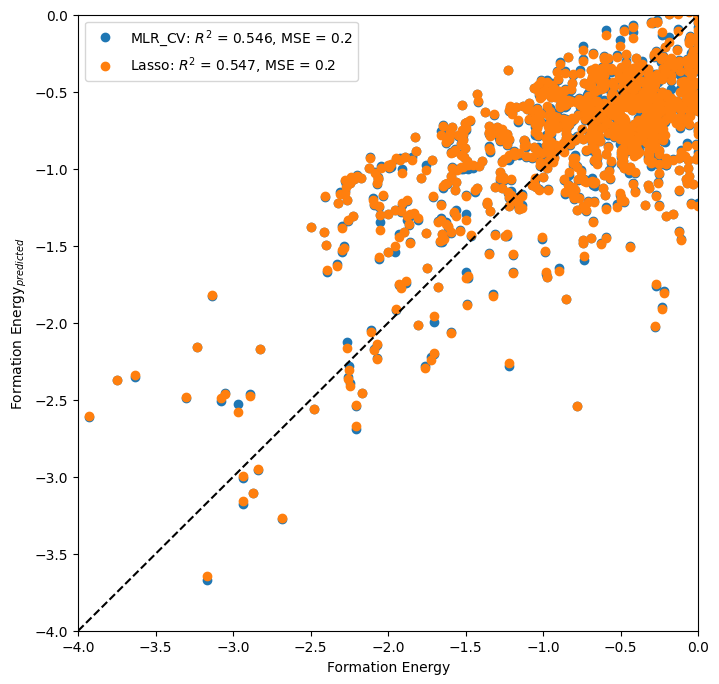

In [90]:
lasso = linear_model.Lasso(alpha=best_alpha, max_iter=10000)
ypred_lasso = cross_val_predict(lasso, z_formation, y_formation, cv=kfold)
r2_lasso = r2_score(y_formation, ypred_lasso)
mse_lasso = mean_squared_error(y_formation, ypred_lasso)
label_lasso = "Lasso: $R^2$ = %.3f, MSE = %.1f" % (r2_lasso, mse_lasso)
f, ax = plt.subplots(figsize=(8, 8))
plt.plot(y_formation, ypred_cv, "o", label=label_cv)
plt.plot(y_formation, ypred_lasso, "o", label=label_lasso)
l = plt.ylabel("Formation Energy$_{predicted}$")
l = plt.xlabel("Formation Energy")
plt.legend()
plt.xlim([-4, 0])
plt.ylim([-4, 0])
plt.plot([-4, 0], [-4, 0], "k--");

By comparing the models, we see that for a mix of binary and ternery compounds, we get similar preformance from both the regular liner regression and the LASSO model.

#**Binary Compounds**

I will now repeat this method but split the data into binary and ternery sets. To start with, I will make a collumn in my original data frame that is the countd number of unique elements(making use of the compositon function from before)

In [91]:
mp_query2["num_elem"] = 0
for i in range(len(mp_query2["formula_pretty"])):
  comp = Composition(mp_query2["formula_pretty"][i])
  num = len(comp.elements) # this will give you the elements
  mp_query2["num_elem"][i] = num

mp_query2.info()

<ipython-input-91-948c40122aed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query2["num_elem"][i] = num


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                1020 non-null   object 
 1   band_gap                   1020 non-null   float64
 2   formation_energy_per_atom  1020 non-null   float64
 3   density_atomic             1020 non-null   float64
 4   formula_pretty             1020 non-null   object 
 5   is_magnetic                1020 non-null   bool   
 6   total_magnetization        1020 non-null   float64
 7   theoretical                1020 non-null   bool   
 8   volume                     1020 non-null   float64
 9   energy_above_hull          1020 non-null   float64
 10  symmetry                   1020 non-null   object 
 11  structure                  1020 non-null   object 
 12  efermi                     1020 non-null   float64
 13  comp_ave_rad               1020 non-null   float

Now, I can create two new data frames based on binary and ternery compounds. I will give thme unique names, as I will need these three seperate data-frames for the classification models to predict metalic character later on.

In [92]:
df_binary = mp_query2[mp_query2["num_elem"]==2]
df_tertiary = mp_query2[mp_query2["num_elem"]==3]
df_binary.info()
df_tertiary.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 1019
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                785 non-null    object 
 1   band_gap                   785 non-null    float64
 2   formation_energy_per_atom  785 non-null    float64
 3   density_atomic             785 non-null    float64
 4   formula_pretty             785 non-null    object 
 5   is_magnetic                785 non-null    bool   
 6   total_magnetization        785 non-null    float64
 7   theoretical                785 non-null    bool   
 8   volume                     785 non-null    float64
 9   energy_above_hull          785 non-null    float64
 10  symmetry                   785 non-null    object 
 11  structure                  785 non-null    object 
 12  efermi                     785 non-null    float64
 13  comp_ave_rad               785 non-null    float6

I will now repeat the process from before, creating 2 new sets, with the labeled data having all numeric quanities(except formation energy) except now also droping the new number of elements collums(which should only have 1 value in the data-set anyways)

In [93]:
x_formation_2 = df_binary.drop(["material_id","formula_pretty","is_magnetic","theoretical","symmetry","structure","formation_energy_per_atom","num_elem"],axis=1).copy()
y_formation_2 = df_binary["formation_energy_per_atom"].copy()

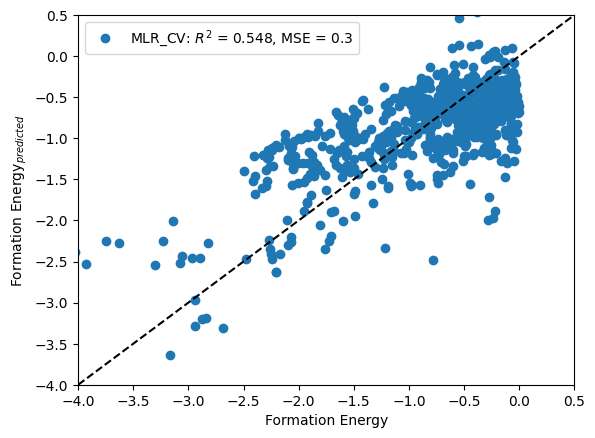

In [94]:
kfold = KFold(n_splits=10, shuffle=True, random_state=16)
reg_cv = linear_model.LinearRegression()
ypred_cv = cross_val_predict(reg_cv, x_formation_2, y_formation_2, cv=kfold)
r2_cv = r2_score(y_formation_2, ypred_cv)
mse_cv = mean_squared_error(y_formation_2, ypred_cv)
label_cv = "MLR_CV: $R^2$ = %.3f, MSE = %.1f" % (r2_cv, mse_cv)
#equation = ["%.2e %s" % (v, f) for v, f in zip(reg_cv.coef_, x_formation.columns)]
#print("K = %.1f + %s" % (reg.intercept_, " + ".join(equation)))
plt.plot(y_formation_2, ypred_cv, "o", label=label_cv)
plt.ylabel(r"Formation Energy$_{predicted}$")
plt.xlabel(r"Formation Energy")
plt.legend()
plt.xlim([-4, 0.5])
plt.ylim([-4, 0.5])
plt.plot([-4, 0.5], [-4, 0.5], "k--");

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.731e+01, tolerance: 4.588e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.129e+01, tolerance: 4.119e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.080e+01, tolerance: 4.243e

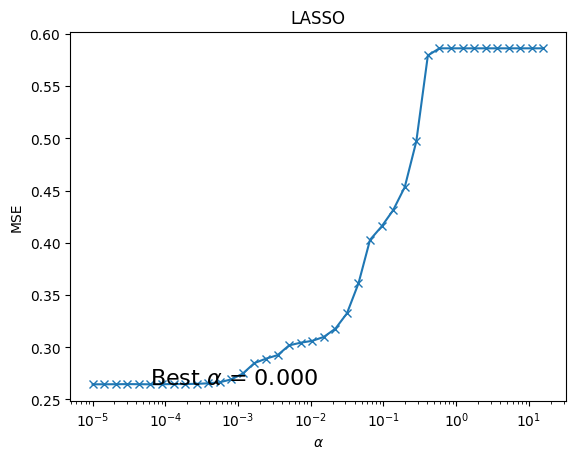

In [95]:
scaler = StandardScaler()
scaler.fit(x_formation_2)
means_ = scaler.mean_
stds_ = scaler.scale_
z_formation_2 = scaler.transform(x_formation_2)

alphas = np.logspace(-5, 1.2, 40)
cv_results = []
coeffs = []
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(z_formation_2, y_formation_2)
    scores = cross_validate(lasso, z_formation_2, y_formation_2, cv=kfold, scoring="neg_mean_squared_error")
    cv_results.append([alpha, -np.mean(scores["test_score"])] + list(lasso.coef_))
features = ["band_gap","density_atomic","total_magnetization","volume","energy_above_hull",
            "efermi","comp_ave_rad","comp_ave_mass","NumberofNeutrons","NumberofProtons",
            "NumberofElectrons","comp_ave_area","comp_ave_vol","tot_mass","tot_area","tot_vol"]
cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features)
plt.plot(cv_results["alpha"], cv_results["score"], "-x")
#plt.xlim([1e-2, 10**1.2])
#plt.ylim((3700, 4500))
plt.xscale("log")
plt.xlabel(r"$\alpha$")
plt.ylabel("MSE")
plt.title("LASSO")
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % best_alpha,
    (best_alpha, cv_results["score"].min()),
    fontsize=16,
);

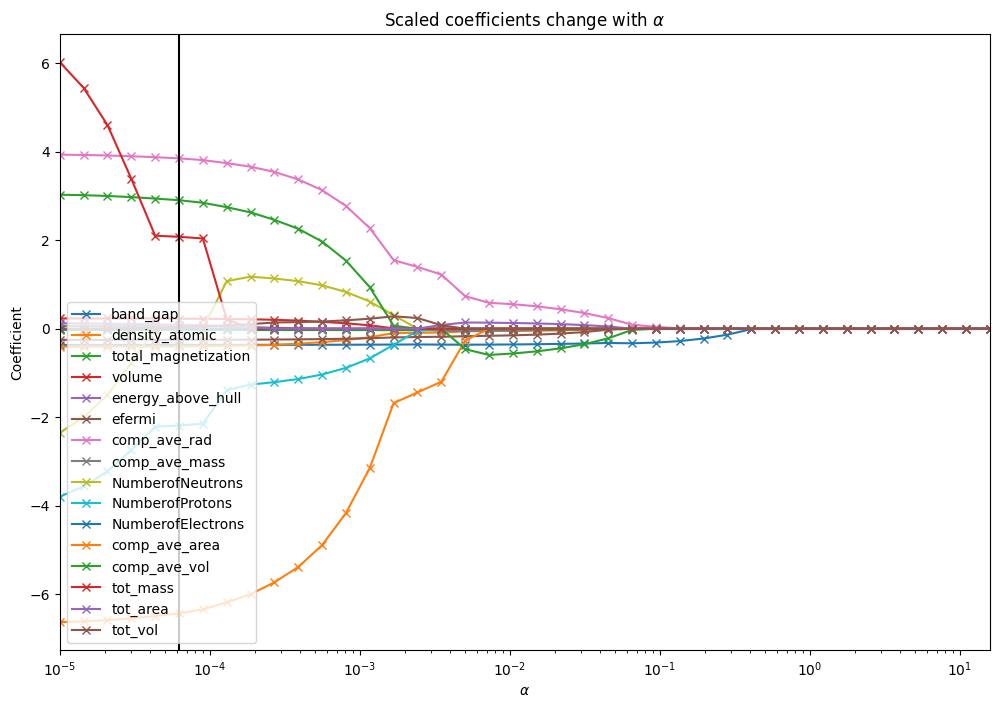

In [96]:
f, ax = plt.subplots(figsize=(12, 8))
for f in features:
    plt.plot(cv_results["alpha"], cv_results[f], "-x", label=f)
    plt.xscale("log")
    plt.xlabel(r"$\alpha$")
    plt.ylabel("Coefficient")
    plt.title(r"Scaled coefficients change with $\alpha$")
plt.legend()
plt.axvline(x = best_alpha, color = 'black')
plt.xlim([1e-5, 10**1.2]);

In [97]:
reg = linear_model.Lasso(alpha=best_alpha, max_iter=1000)
reg.fit(x_formation_2, y_formation_2)
real_coef = reg.coef_ / stds_  # convert back to unnormalized inputs
real_interp = reg.intercept_ - means_.dot(real_coef)  # convert back to unnormalized inputs
equation = ["%.2e %s" % (v, f) for v, f in zip(real_coef, features) if abs(v) > 1e-4]
print("K = %.1f + %s" % (real_interp, " + ".join(equation)))

K = -48.2 + -2.79e-01 band_gap + -5.09e-03 density_atomic + -1.21e-02 total_magnetization + 4.68e-04 volume + -3.52e-02 efermi + 2.97e+01 comp_ave_rad + -1.03e-03 NumberofProtons + -3.33e+00 comp_ave_area + 1.15e-01 comp_ave_vol + 1.86e-04 tot_mass + -2.86e-02 tot_area + 5.11e-03 tot_vol


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.026e+02, tolerance: 4.588e-02
  model = cd_fast.enet_coordinate_descent(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.264e+00, tolerance: 4.119e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.034e+00, tolerance: 4.243e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.648e+00, tolerance: 4.205e

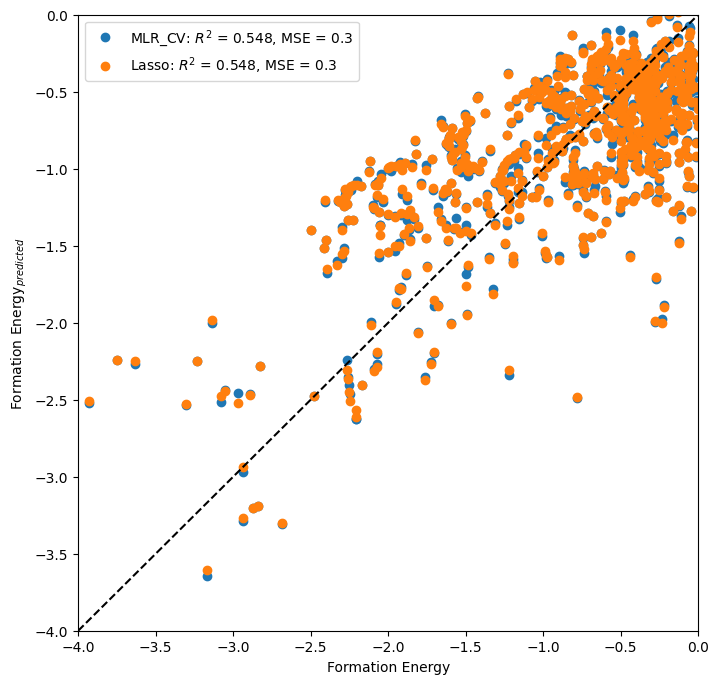

In [98]:
lasso = linear_model.Lasso(alpha=best_alpha, max_iter=10000)
ypred_lasso = cross_val_predict(lasso, z_formation_2, y_formation_2, cv=kfold)
r2_lasso = r2_score(y_formation_2, ypred_lasso)
mse_lasso = mean_squared_error(y_formation_2, ypred_lasso)
label_lasso = "Lasso: $R^2$ = %.3f, MSE = %.1f" % (r2_lasso, mse_lasso)
f, ax = plt.subplots(figsize=(8, 8))
plt.plot(y_formation_2, ypred_cv, "o", label=label_cv)
plt.plot(y_formation_2, ypred_lasso, "o", label=label_lasso)
l = plt.ylabel("Formation Energy$_{predicted}$")
l = plt.xlabel("Formation Energy")
plt.legend()
plt.xlim([-4, 0])
plt.ylim([-4, 0])
plt.plot([-4, 0], [-4, 0], "k--");

Overall, the same feature are important, which should be expected if there is any physical signifcance. The model preforms with similar metrics as before. Since the data set of binary compounds is much larger than ternery, this is perhaps unsurprising.

#**Tertiary Compounds**

Now the same is done with ternery compounds. This data set is the smaller of the 2 distingueshed sets, so perhaps will not preform as well.

In [99]:
x_formation_3 = df_tertiary.drop(["material_id","formula_pretty","is_magnetic","theoretical","symmetry","structure","formation_energy_per_atom","num_elem"],axis=1).copy()
y_formation_3 = df_tertiary["formation_energy_per_atom"].copy()

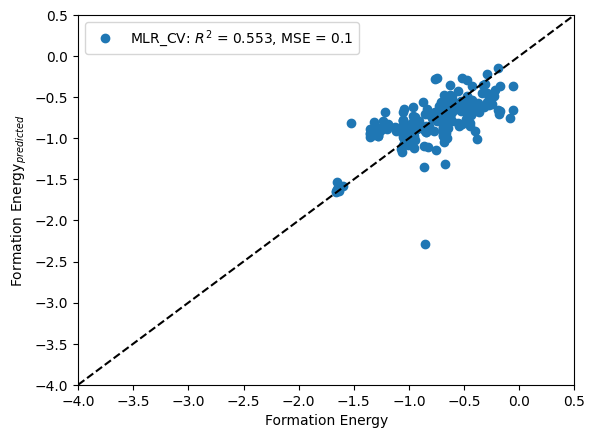

In [100]:
kfold = KFold(n_splits=10, shuffle=True, random_state=16)
reg_cv = linear_model.LinearRegression()
ypred_cv = cross_val_predict(reg_cv, x_formation_3, y_formation_3, cv=kfold)
r2_cv = r2_score(y_formation_3, ypred_cv)
mse_cv = mean_squared_error(y_formation_3, ypred_cv)
label_cv = "MLR_CV: $R^2$ = %.3f, MSE = %.1f" % (r2_cv, mse_cv)
#equation = ["%.2e %s" % (v, f) for v, f in zip(reg_cv.coef_, x_formation.columns)]
#print("K = %.1f + %s" % (reg.intercept_, " + ".join(equation)))
plt.plot(y_formation_3, ypred_cv, "o", label=label_cv)
plt.ylabel(r"Formation Energy$_{predicted}$")
plt.xlabel(r"Formation Energy")
plt.legend()
plt.xlim([-4, 0.5])
plt.ylim([-4, 0.5])
plt.plot([-4, 0.5], [-4, 0.5], "k--");

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.884e-03, tolerance: 3.316e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.493e+00, tolerance: 3.208e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e-01, tolerance: 2.111e

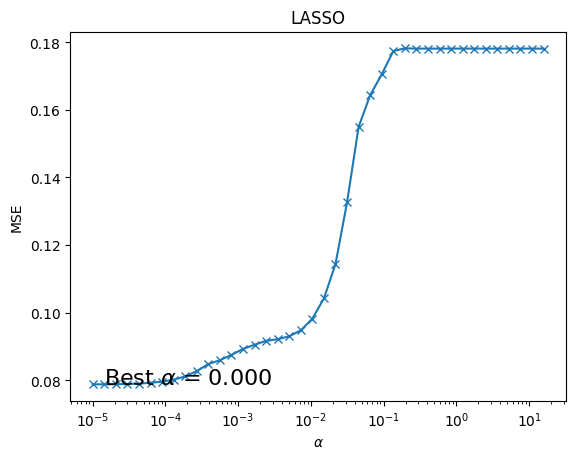

In [101]:
scaler = StandardScaler()
scaler.fit(x_formation_3)
means_ = scaler.mean_
stds_ = scaler.scale_
z_formation_3 = scaler.transform(x_formation_3)

alphas = np.logspace(-5, 1.2, 40)
cv_results = []
coeffs = []
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(z_formation_3, y_formation_3)
    scores = cross_validate(lasso, z_formation_3, y_formation_3, cv=kfold, scoring="neg_mean_squared_error")
    cv_results.append([alpha, -np.mean(scores["test_score"])] + list(lasso.coef_))
features = ["band_gap","density_atomic","total_magnetization","volume","energy_above_hull",
            "efermi","comp_ave_rad","comp_ave_mass","NumberofNeutrons","NumberofProtons",
            "NumberofElectrons","comp_ave_area","comp_ave_vol","tot_mass","tot_area","tot_vol"]
cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features)
plt.plot(cv_results["alpha"], cv_results["score"], "-x")
#plt.xlim([1e-2, 10**1.2])
#plt.ylim((3700, 4500))
plt.xscale("log")
plt.xlabel(r"$\alpha$")
plt.ylabel("MSE")
plt.title("LASSO")
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % best_alpha,
    (best_alpha, cv_results["score"].min()),
    fontsize=16,
);

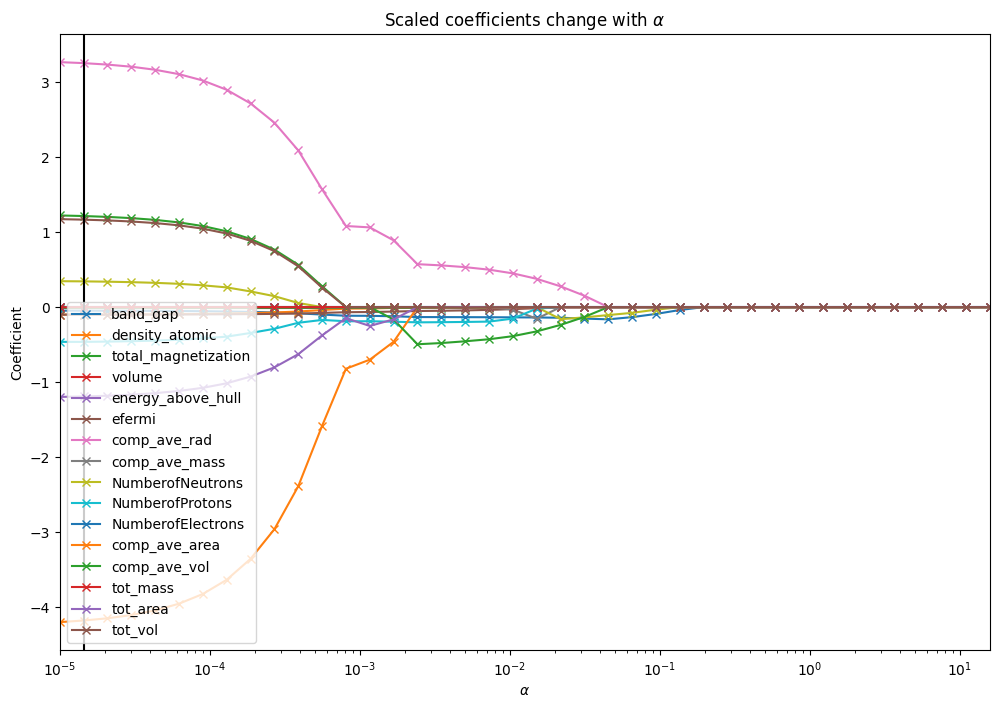

In [102]:
f, ax = plt.subplots(figsize=(12, 8))
for f in features:
    plt.plot(cv_results["alpha"], cv_results[f], "-x", label=f)
    plt.xscale("log")
    plt.xlabel(r"$\alpha$")
    plt.ylabel("Coefficient")
    plt.title(r"Scaled coefficients change with $\alpha$")
plt.legend()
plt.axvline(x = best_alpha, color = 'black')
plt.xlim([1e-5, 10**1.2]);

In [103]:
reg = linear_model.Lasso(alpha=best_alpha, max_iter=1000)
reg.fit(x_formation_3, y_formation_3)
real_coef = reg.coef_ / stds_  # convert back to unnormalized inputs
real_interp = reg.intercept_ - means_.dot(real_coef)  # convert back to unnormalized inputs
equation = ["%.2e %s" % (v, f) for v, f in zip(real_coef, features) if abs(v) > 1e-4]
print("K = %.1f + %s" % (real_interp, " + ".join(equation)))

K = -107.6 + -3.24e-01 band_gap + -2.53e-03 density_atomic + -3.60e-03 total_magnetization + -4.12e-02 efermi + 6.49e+01 comp_ave_rad + -4.72e-04 comp_ave_mass + -1.69e-04 NumberofProtons + -4.61e+00 comp_ave_area + 1.36e-01 comp_ave_vol + -3.08e-01 tot_area + 1.65e-02 tot_vol


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.674e+00, tolerance: 3.519e-03
  model = cd_fast.enet_coordinate_descent(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.889e+00, tolerance: 3.316e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.876e+00, tolerance: 3.208e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.082e+00, tolerance: 2.111e

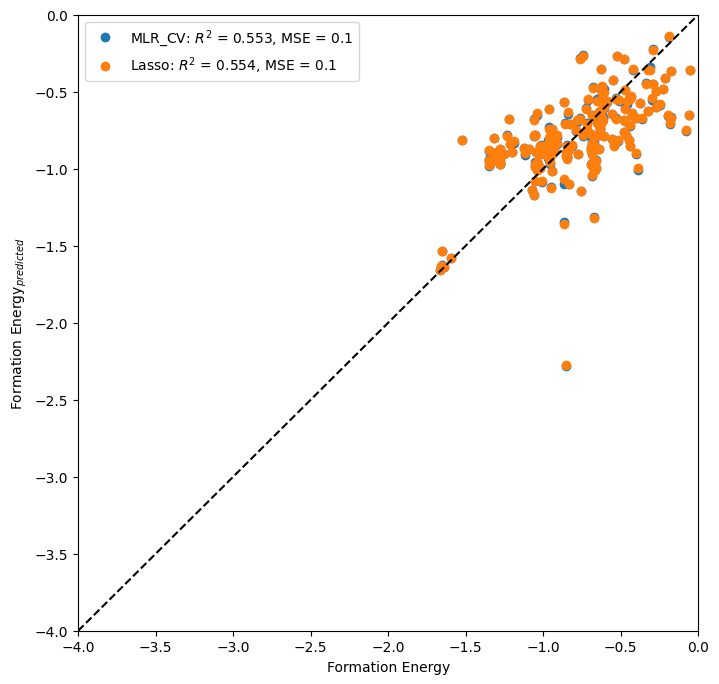

In [104]:
lasso = linear_model.Lasso(alpha=best_alpha, max_iter=10000)
ypred_lasso = cross_val_predict(lasso, z_formation_3, y_formation_3, cv=kfold)
r2_lasso = r2_score(y_formation_3, ypred_lasso)
mse_lasso = mean_squared_error(y_formation_3, ypred_lasso)
label_lasso = "Lasso: $R^2$ = %.3f, MSE = %.1f" % (r2_lasso, mse_lasso)
f, ax = plt.subplots(figsize=(8, 8))
plt.plot(y_formation_3, ypred_cv, "o", label=label_cv)
plt.plot(y_formation_3, ypred_lasso, "o", label=label_lasso)
l = plt.ylabel("Formation Energy$_{predicted}$")
l = plt.xlabel("Formation Energy")
plt.legend()
plt.xlim([-4, 0])
plt.ylim([-4, 0])
plt.plot([-4, 0], [-4, 0], "k--");

Despite a smaller data set, the ternery model preforms just as well as the model for binary compounds and teh hybrid modwel. Feature importance shows the same relative importance on the composition averaged size features

#**Classification Models**

Next, I will build some models predicting whether a compound is a metal or not. I will define from the outset something as a metal if it has a band gap of <.001 eV. I will define my own is_metal collumns to give a numeric definition of the band gap being above or below the target value, which I can use to compare against the categories my model shows. I will use a decision tree classificaiton model to sort whether a material is a conductor(band gap <.001) or insulator(band gap >=.001)

In [106]:
mp_query2["is_metal"] = 0

for i in range(len(mp_query2["band_gap"])):
  if mp_query2["band_gap"][i] < 0.001:
    mp_query2["is_metal"][i] = 1
#mp_query2.loc[mp_query2.is_metal < 0.001,'is_metal'] = 1.
#mp_query2.loc[mp_query2.is_metal >= 0.001,'is_metal'] = 0.
mp_query2.head()
#x_metal = mp_query2.drop(["material_id","formula_pretty","is_magnetic","theoretical","symmetry","structure","band_gap"],axis=1).copy()
#y_metal = mp_query2["formation_energy_per_atom"].copy()

<ipython-input-106-6295806656b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query2["is_metal"][i] = 1


,material_id,band_gap,formation_energy_per_atom,density_atomic,formula_pretty,is_magnetic,total_magnetization,theoretical,volume,energy_above_hull,...,NumberofNeutrons,NumberofProtons,NumberofElectrons,comp_ave_area,comp_ave_vol,tot_mass,tot_area,tot_vol,num_elem,is_metal
0,mp-30746,0.0000,-0.820320,19.936594,YIr,False,0.000000,False,39.873188,0.0,...,165,116,116,4.450,9.5130,281.123,8.90,19.026,2,1
1,mp-44,0.0000,0.000000,19.651076,U,False,0.000000,False,39.302152,0.0,...,146,92,92,5.290,12.1670,238.029,5.29,12.167,1,1
2,mp-22903,3.7765,-1.721174,50.291109,RbI,False,0.000000,False,100.582218,0.0,...,122,90,90,5.345,14.5985,212.372,10.69,29.197,2,0
3,mp-1548,0.0000,-0.112877,30.082915,PrMg,False,0.000030,False,60.165829,0.0,...,94,71,71,5.090,12.2980,165.213,10.18,24.596,2,1
4,mp-1121,0.0000,-0.282003,11.540837,GaCo,True,0.300304,False,23.081674,0.0,...,71,58,58,3.065,5.3725,128.656,6.13,10.745,2,1


Here, since I am using classificaiton models, I can utilize boolean features. I msut remove feature like band gap, but I can use features I removed before in the formatuon energy model, i.e. the formation energy. Since number of elements can vary, I will leave that feature in

In [109]:
x_metal = mp_query2.drop(["material_id","formula_pretty","symmetry","structure","band_gap","is_metal"],axis=1).copy()
y_metal = mp_query2["is_metal"].copy()

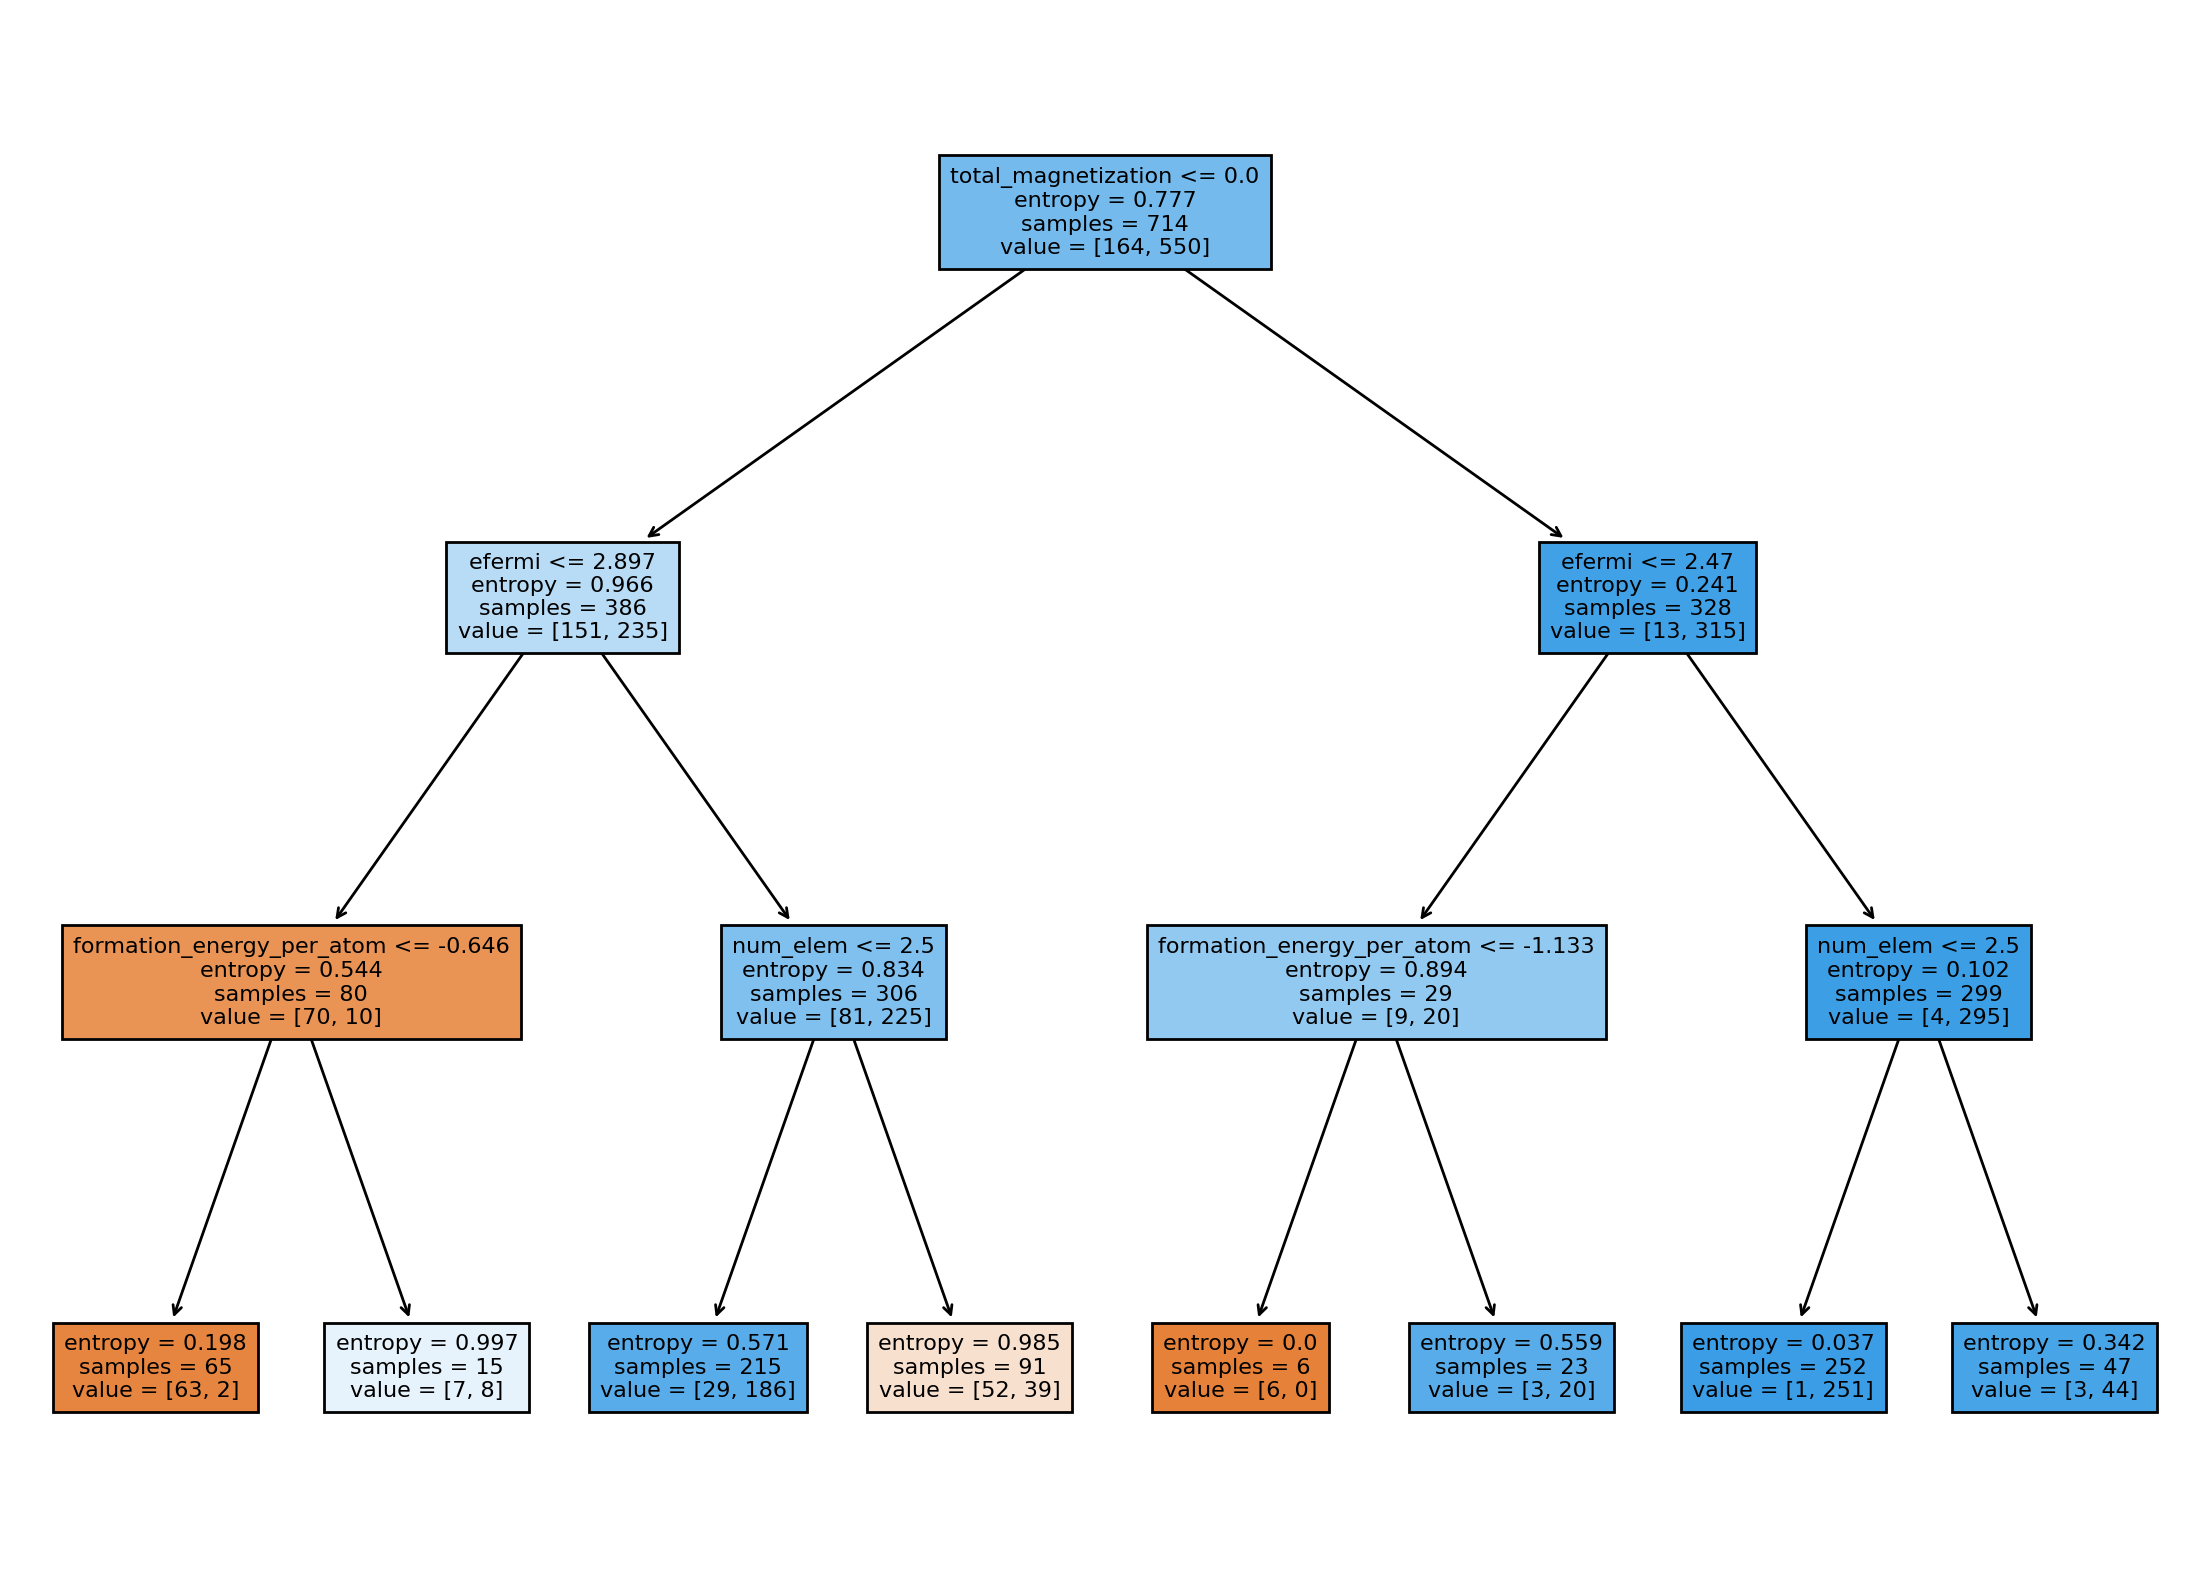

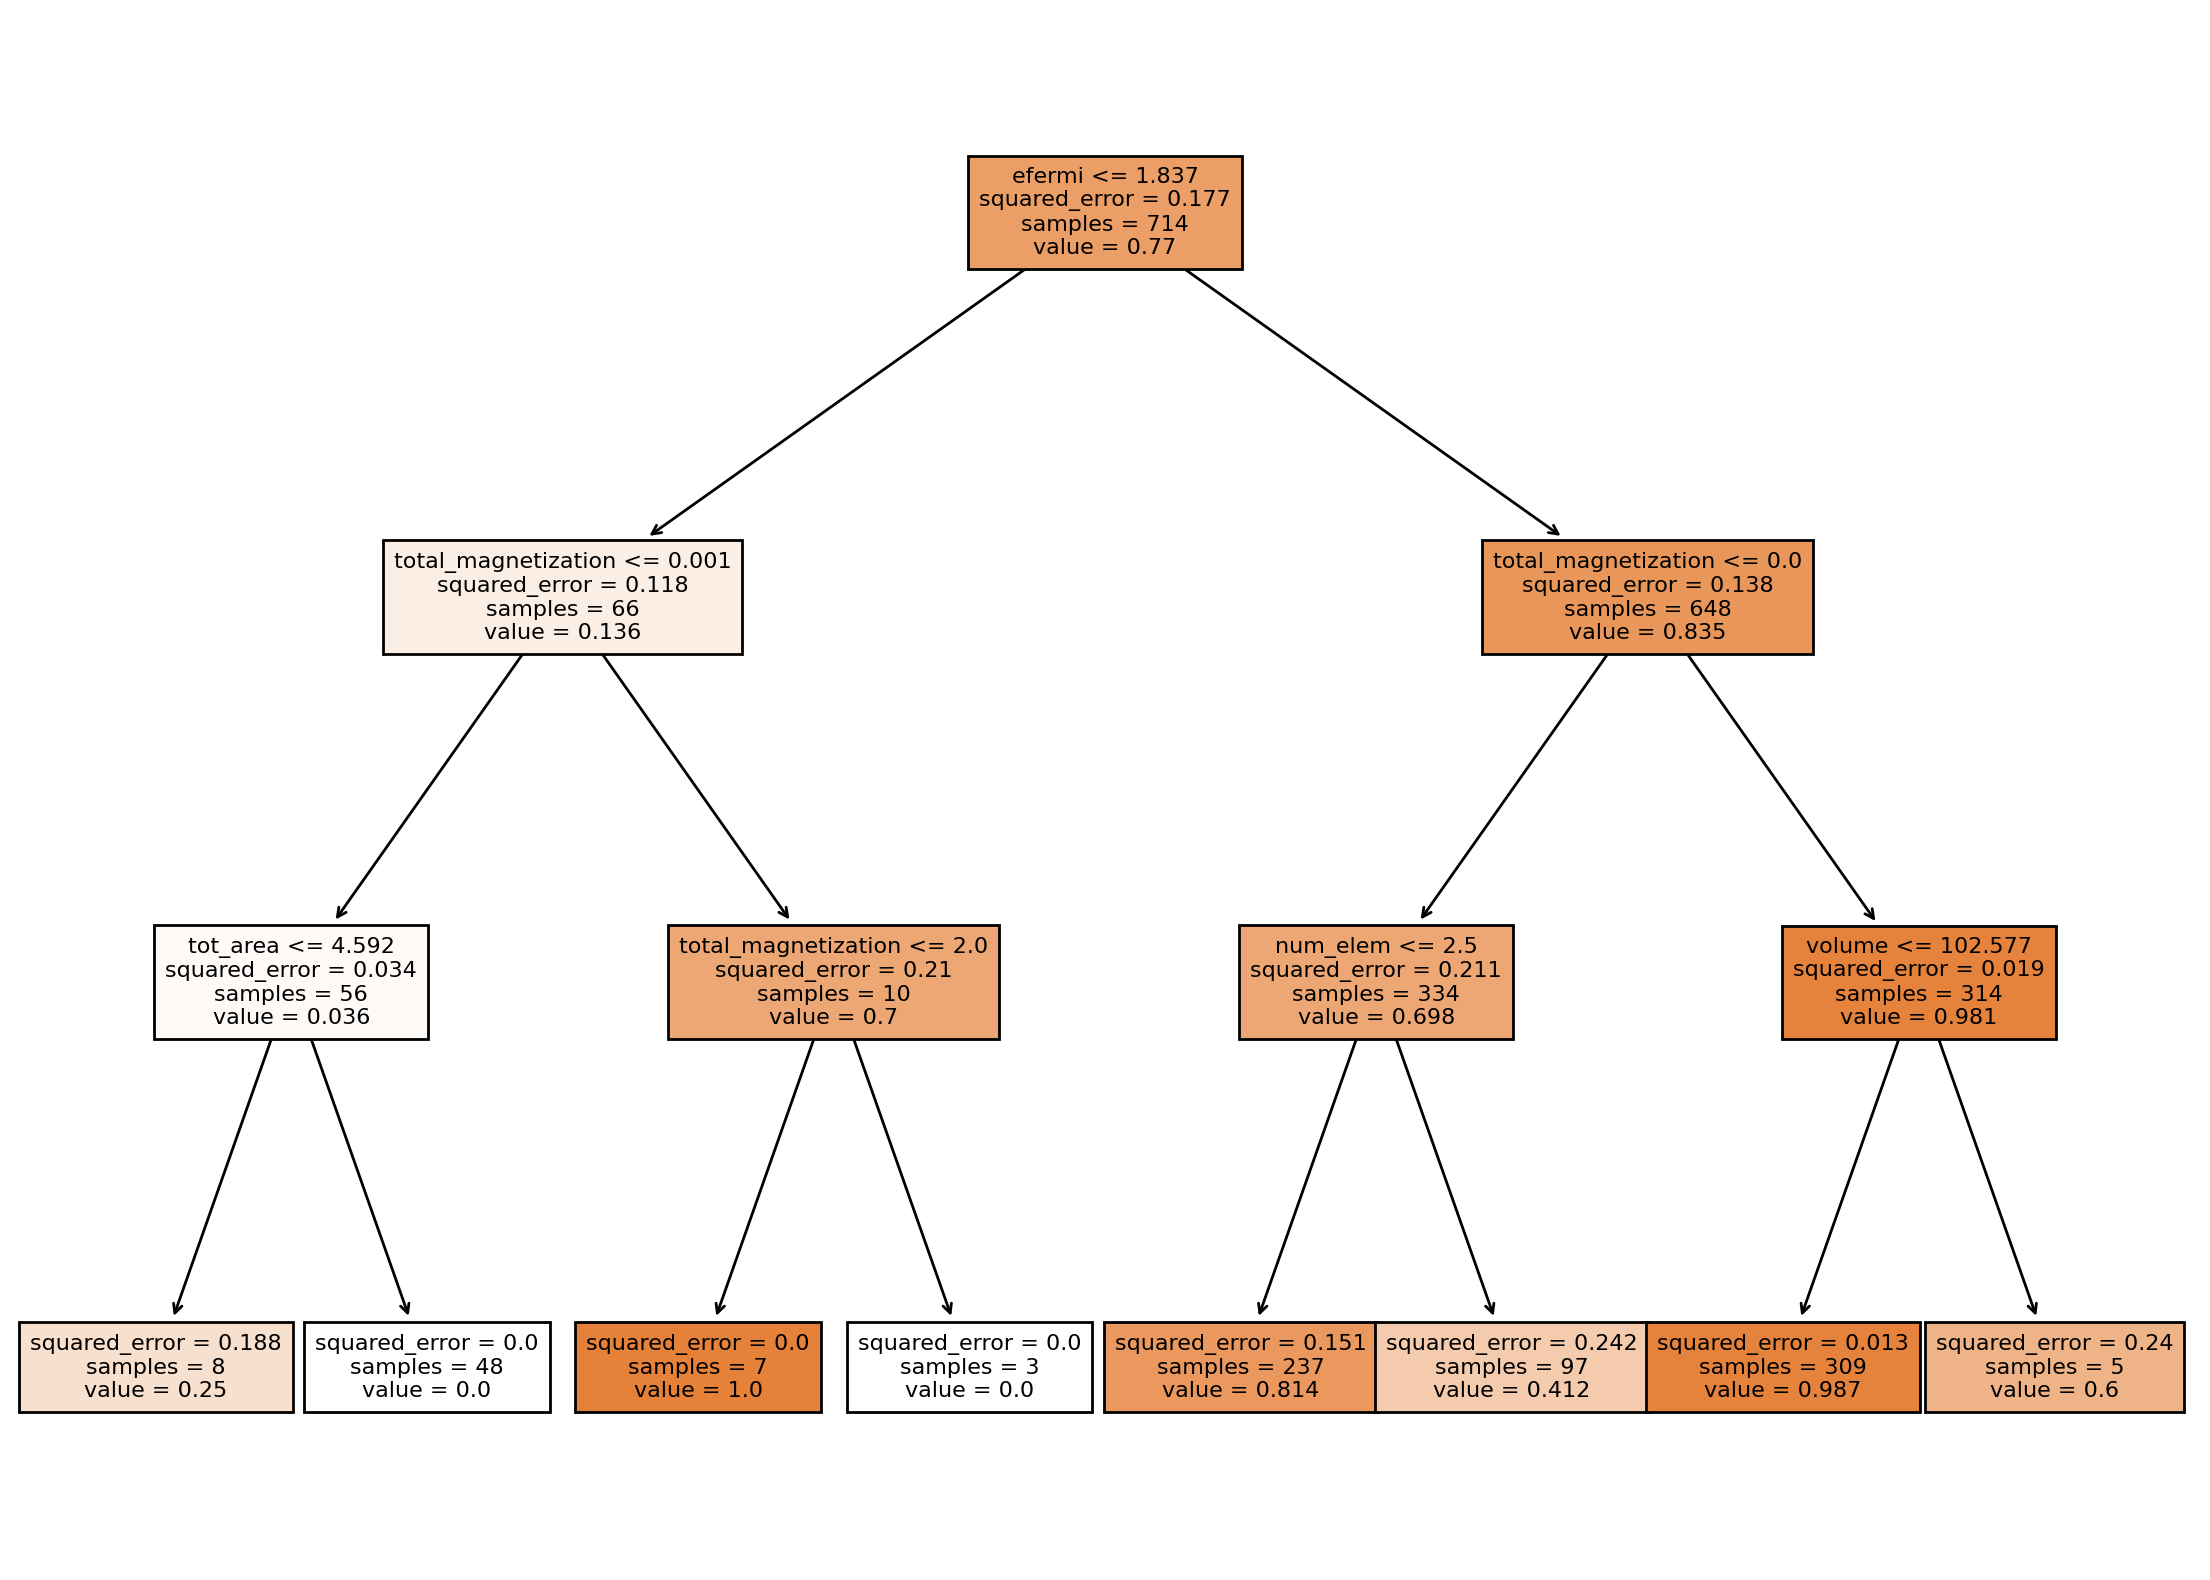

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(
    x_metal, y_metal, test_size=0.30, random_state=4)


X_test, X_val, y_test, y_val = train_test_split(
     X_test_val, y_test_val, test_size=0.50, random_state=60)

kfold = KFold(n_splits=10, shuffle=True, random_state=16)
tree_cv = DecisionTreeClassifier(criterion='entropy',max_depth=3)
tree_cv.fit(X_train,y_train)
ypred_cv = cross_val_predict(tree_cv, x_metal, y_metal, cv=kfold)

plt.figure(figsize=(14, 10),dpi=200)
tree.plot_tree(tree_cv, filled=True, feature_names=x_metal.columns,fontsize=8)
plt.show()


tree_cv = DecisionTreeRegressor(criterion='squared_error',max_depth=3)
tree_cv.fit(X_train,y_train)
ypred_cv = cross_val_predict(tree_cv, x_metal, y_metal, cv=kfold)

plt.figure(figsize=(14, 10),dpi=200)
tree.plot_tree(tree_cv, filled=True, feature_names=x_metal.columns,fontsize=8)
plt.show()

To opimize this model, I need to tune the max_depth of the tree.

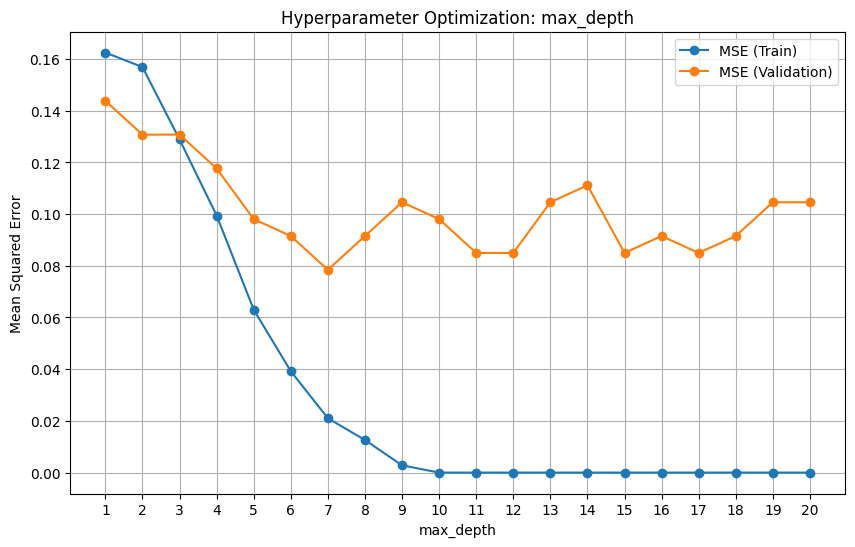

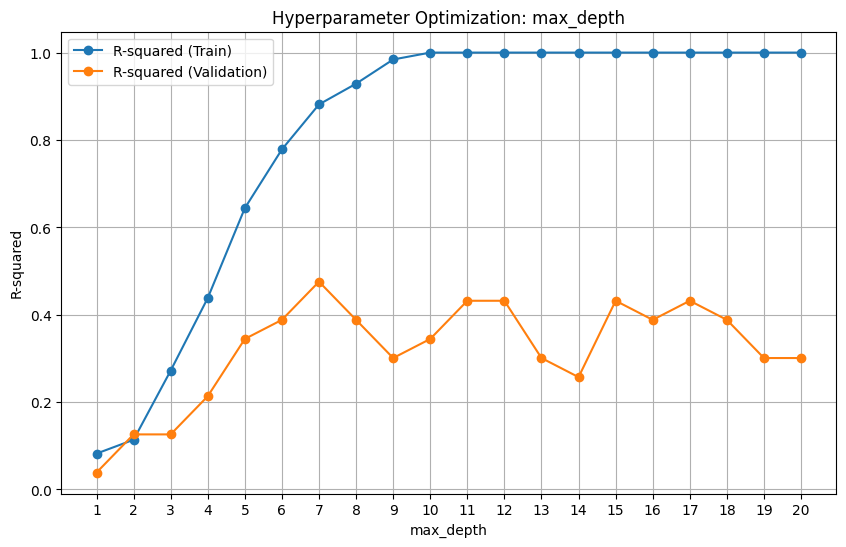

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Define a range of max_depth values to try
max_depth_values = range(1, 21)
# Initialize lists to store MSE and R-squared values for train, validation, and test sets
mse_train_values = []
r2_train_values = []
mse_val_values = []
r2_val_values = []
# Hyperparameter optimization loop
for max_depth in max_depth_values:
    # Create and train the decision tree regression model
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    # Make predictions on the train set
    y_train_pred = model.predict(X_train)
    # Compute MSE and R-squared for train set
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)
    # Compute MSE and R-squared for validation set
    mse_val = mean_squared_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)
    # Append the results to the lists
    mse_train_values.append(mse_train)
    r2_train_values.append(r2_train)
    mse_val_values.append(mse_val)
    r2_val_values.append(r2_val)
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mse_train_values, 'o-', label='MSE (Train)')
plt.plot(max_depth_values, mse_val_values, 'o-', label='MSE (Validation)')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_train_values, 'o-', label='R-squared (Train)')
plt.plot(max_depth_values, r2_val_values, 'o-', label='R-squared (Validation)')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

Then I pass the optimal max depth into the model.

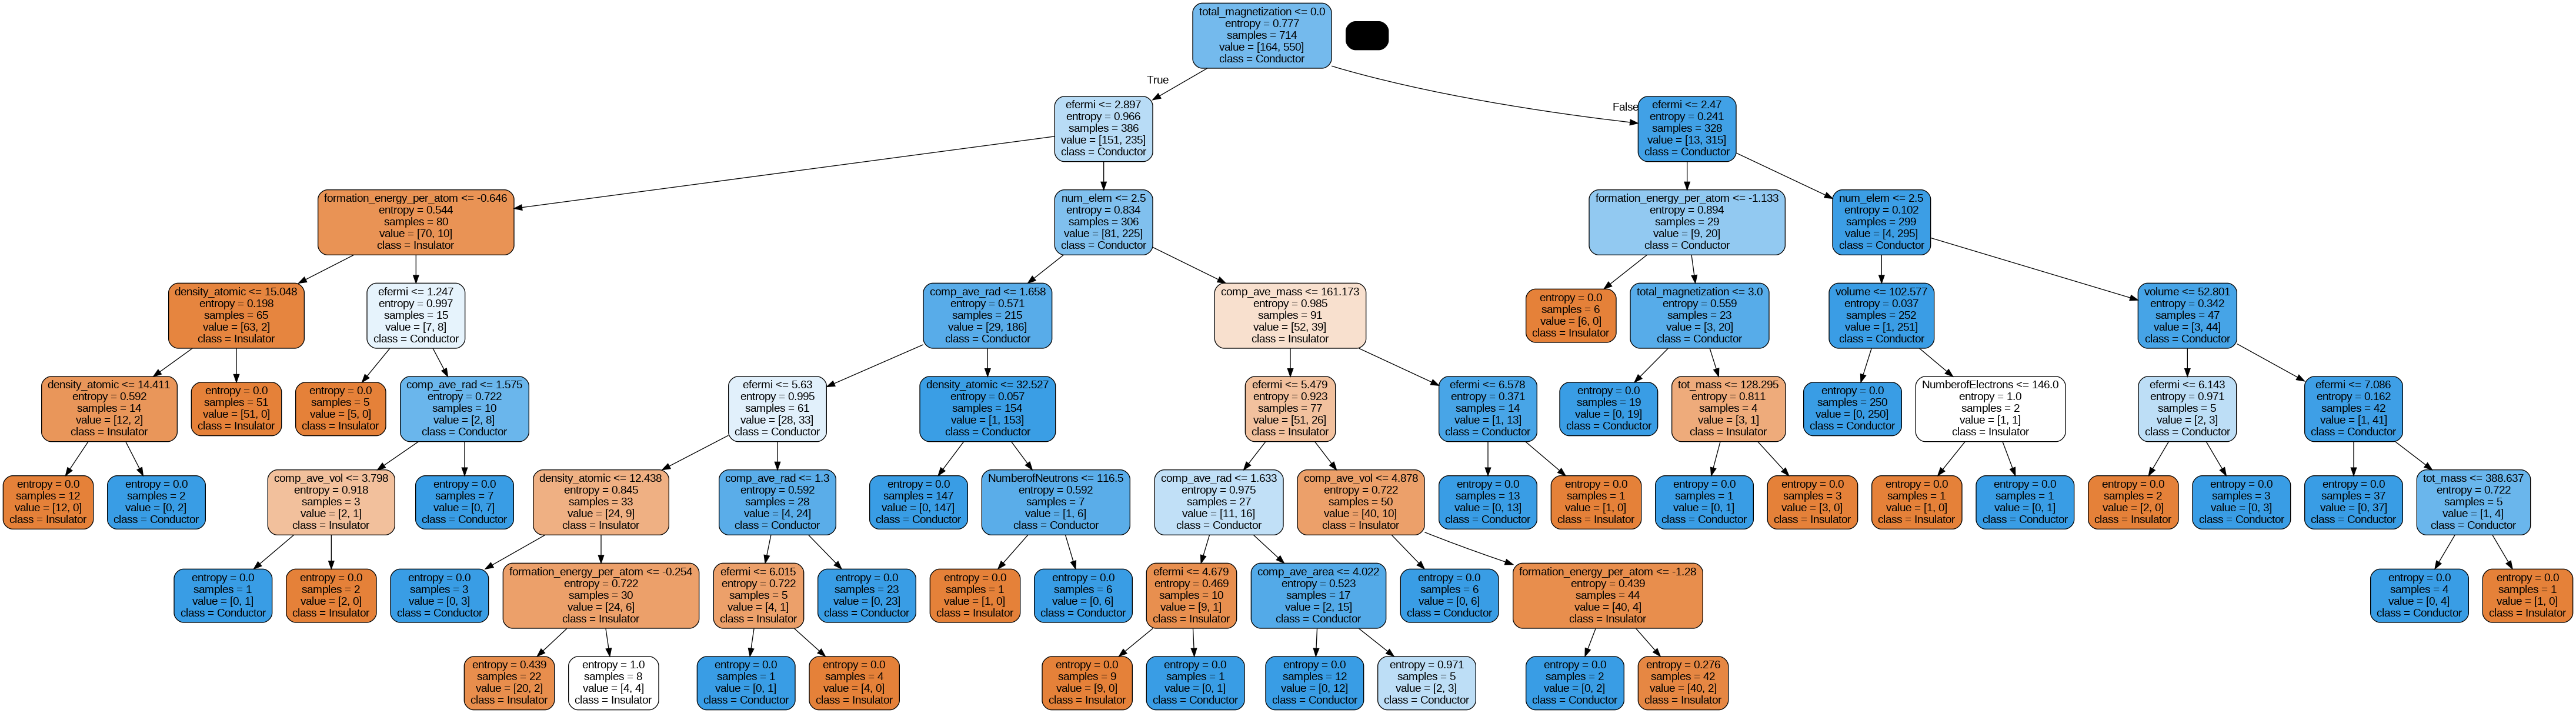

In [112]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
# Create a model and train it
model = DecisionTreeClassifier(criterion="entropy", max_depth=7)
model.fit(X_train, y_train)
# Export the decision tree to a dot file
dot_data = export_graphviz(model, out_file=None, feature_names=x_metal.columns.tolist(), class_names=['Insulator','Conductor'], filled=True, rounded=True)
# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)
# Display the decision tree using Image class
Image(graph.create_png())

The conductors are shown in blue and the insulators in Orange. COmputing confusion matrix and accuracy score to visualize how well the model worked for hybrid systems:

In [113]:
y_test_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_test_pred))
print(accuracy_score(y_test, y_test_pred))

[[ 29   4]
 [  6 114]]
0.934640522875817


and the feature importance within this model:

[0.07762045 0.04546533 0.         0.21706846 0.         0.02272673
 0.         0.28909353 0.16020194 0.02576059 0.00794965 0.
 0.00383883 0.00773285 0.03745434 0.01315711 0.         0.
 0.0919302 ]
Feature: formation_energy_per_atom
Score: 0.07762
Feature: density_atomic
Score: 0.04547
Feature: is_magnetic
Score: 0.00000
Feature: total_magnetization
Score: 0.21707
Feature: theoretical
Score: 0.00000
Feature: volume
Score: 0.02273
Feature: energy_above_hull
Score: 0.00000
Feature: efermi
Score: 0.28909
Feature: comp_ave_rad
Score: 0.16020
Feature: comp_ave_mass
Score: 0.02576
Feature: NumberofNeutrons
Score: 0.00795
Feature: NumberofProtons
Score: 0.00000
Feature: NumberofElectrons
Score: 0.00384
Feature: comp_ave_area
Score: 0.00773
Feature: comp_ave_vol
Score: 0.03745
Feature: tot_mass
Score: 0.01316
Feature: tot_area
Score: 0.00000
Feature: tot_vol
Score: 0.00000
Feature: num_elem
Score: 0.09193


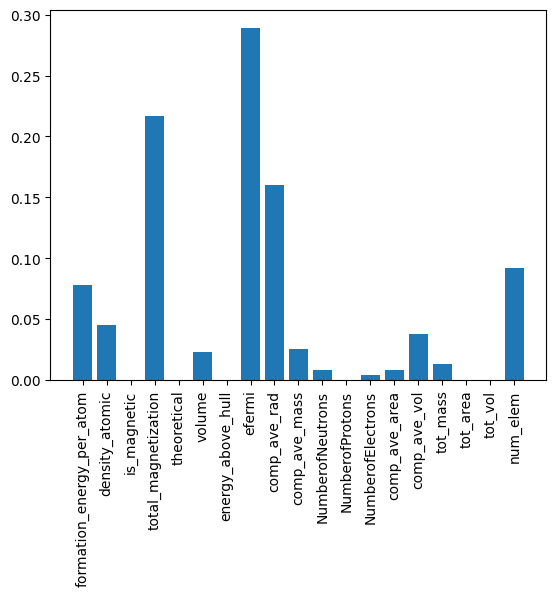

In [115]:
from matplotlib import pyplot
print(model.feature_importances_)
faut_arr = ['formation_energy_per_atom', 'density_atomic', 'is_magnetic',
       'total_magnetization', 'theoretical', 'volume', 'energy_above_hull',
       'efermi', 'comp_ave_rad', 'comp_ave_mass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'comp_ave_area', 'comp_ave_vol',
       'tot_mass', 'tot_area', 'tot_vol', 'num_elem']
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print("Feature:", faut_arr[i])
 print('Score: %.5f' % (v))
# plot feature importance
pyplot.bar([i for i in range(len(importance))], importance)
y_pos = range(len(importance))
# Rotation of the bars names
plt.xticks(y_pos, faut_arr, rotation=90)
pyplot.show()


Compistion averaged radius is once again a really important feature within this model. Interestingly, total magnetization is an important feature.

#**Binary Compounds**

Now, I will run the model on binary and ternery compounbds, as before

In [117]:
df_binary = mp_query2[mp_query2["num_elem"]==2]
df_tertiary = mp_query2[mp_query2["num_elem"]==3]
df_binary.info()
df_tertiary.info()

x_metal_2 = df_binary.drop(["material_id","formula_pretty","symmetry","structure","band_gap","is_metal"],axis=1).copy()
y_metal_2 = df_binary["is_metal"].copy()

x_metal_3 = df_tertiary.drop(["material_id","formula_pretty","symmetry","structure","band_gap","is_metal"],axis=1).copy()
y_metal_3 = df_tertiary["is_metal"].copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 1019
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                785 non-null    object 
 1   band_gap                   785 non-null    float64
 2   formation_energy_per_atom  785 non-null    float64
 3   density_atomic             785 non-null    float64
 4   formula_pretty             785 non-null    object 
 5   is_magnetic                785 non-null    bool   
 6   total_magnetization        785 non-null    float64
 7   theoretical                785 non-null    bool   
 8   volume                     785 non-null    float64
 9   energy_above_hull          785 non-null    float64
 10  symmetry                   785 non-null    object 
 11  structure                  785 non-null    object 
 12  efermi                     785 non-null    float64
 13  comp_ave_rad               785 non-null    float6

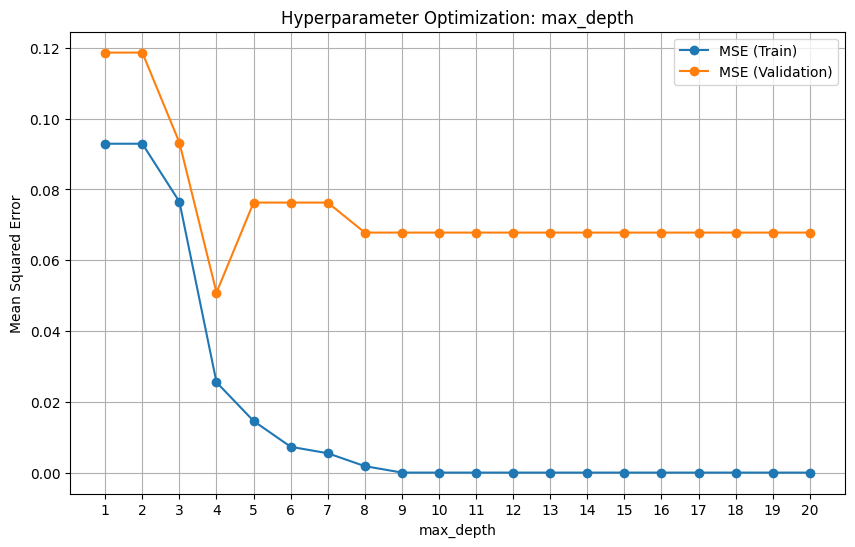

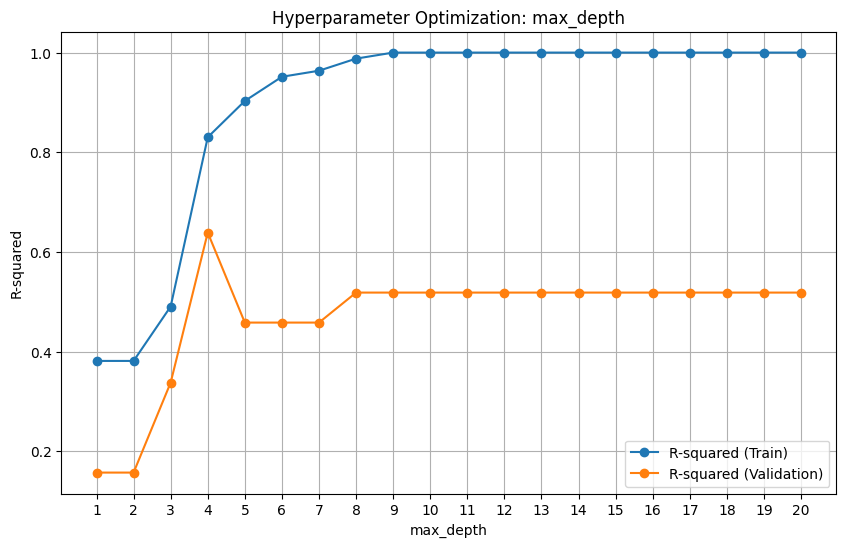

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test_val, y_train, y_test_val = train_test_split(
    x_metal_2, y_metal_2, test_size=0.30, random_state=4)


X_test, X_val, y_test, y_val = train_test_split(
     X_test_val, y_test_val, test_size=0.50, random_state=60)

# Define a range of max_depth values to try
max_depth_values = range(1, 21)
# Initialize lists to store MSE and R-squared values for train, validation, and test sets
mse_train_values = []
r2_train_values = []
mse_val_values = []
r2_val_values = []
# Hyperparameter optimization loop
for max_depth in max_depth_values:
    # Create and train the decision tree regression model
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    # Make predictions on the train set
    y_train_pred = model.predict(X_train)
    # Compute MSE and R-squared for train set
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)
    # Compute MSE and R-squared for validation set
    mse_val = mean_squared_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)
    # Append the results to the lists
    mse_train_values.append(mse_train)
    r2_train_values.append(r2_train)
    mse_val_values.append(mse_val)
    r2_val_values.append(r2_val)
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mse_train_values, 'o-', label='MSE (Train)')
plt.plot(max_depth_values, mse_val_values, 'o-', label='MSE (Validation)')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_train_values, 'o-', label='R-squared (Train)')
plt.plot(max_depth_values, r2_val_values, 'o-', label='R-squared (Validation)')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

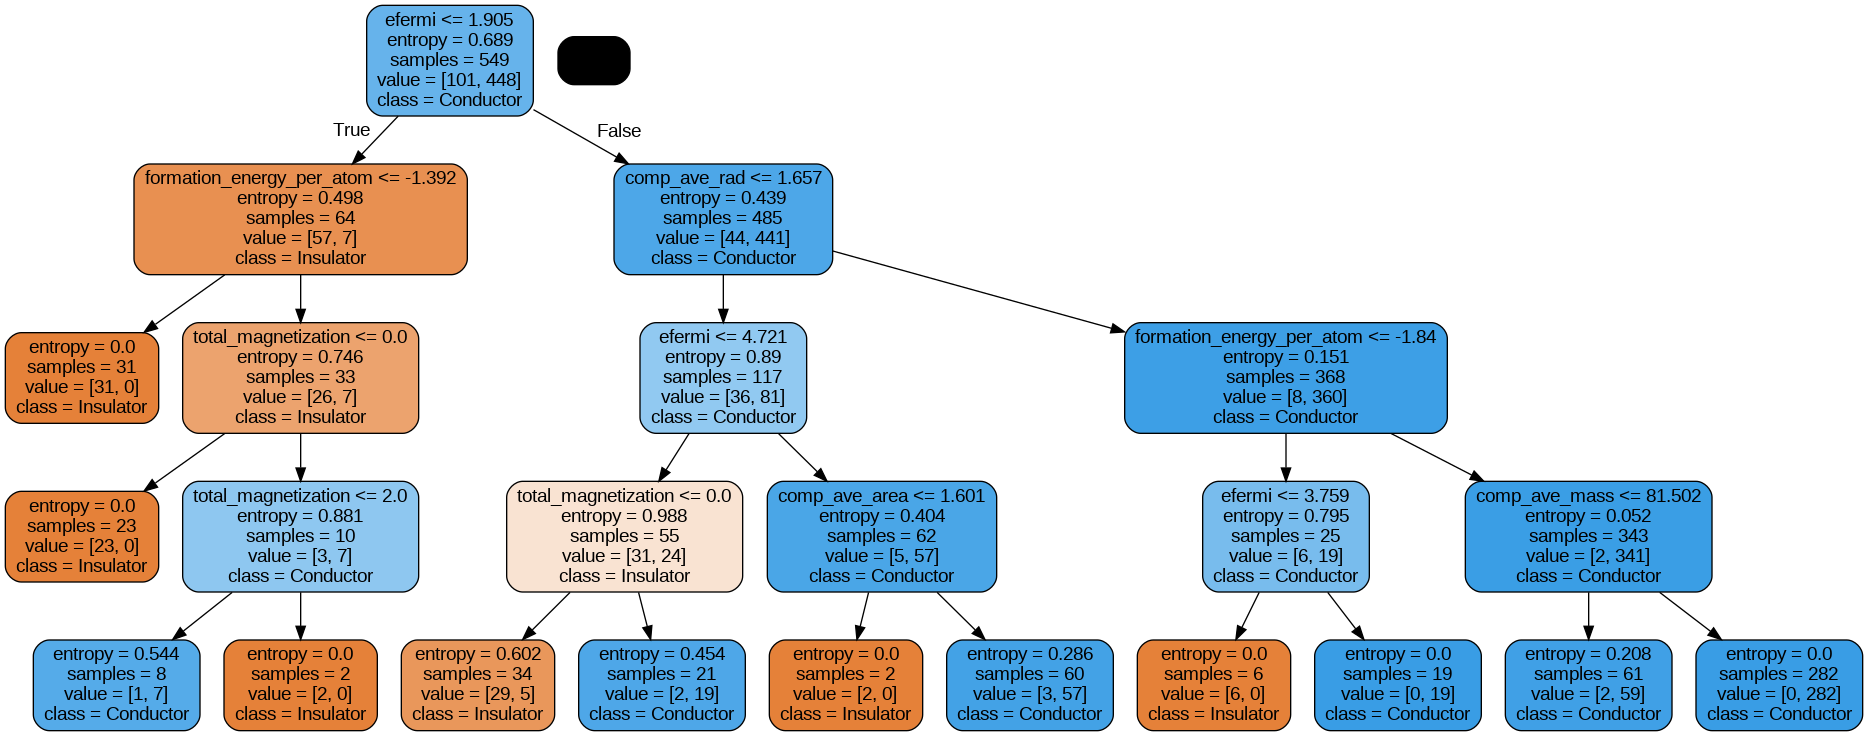

In [119]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
# Create a model and train it
model = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model.fit(X_train, y_train)
# Export the decision tree to a dot file
dot_data = export_graphviz(model, out_file=None, feature_names=x_metal_2.columns.tolist(), class_names=['Insulator','Conductor'], filled=True, rounded=True)
# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)
# Display the decision tree using Image class
Image(graph.create_png())

In [120]:
y_test_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_test_pred))
print(accuracy_score(y_test, y_test_pred))

[[16  2]
 [ 2 98]]
0.9661016949152542


[0.08054328 0.         0.         0.14210253 0.         0.
 0.         0.56713493 0.16907173 0.01600159 0.         0.
 0.         0.02514594 0.         0.         0.         0.
 0.        ]
Feature: formation_energy_per_atom
Score: 0.08054
Feature: density_atomic
Score: 0.00000
Feature: is_magnetic
Score: 0.00000
Feature: total_magnetization
Score: 0.14210
Feature: theoretical
Score: 0.00000
Feature: volume
Score: 0.00000
Feature: energy_above_hull
Score: 0.00000
Feature: efermi
Score: 0.56713
Feature: comp_ave_rad
Score: 0.16907
Feature: comp_ave_mass
Score: 0.01600
Feature: NumberofNeutrons
Score: 0.00000
Feature: NumberofProtons
Score: 0.00000
Feature: NumberofElectrons
Score: 0.00000
Feature: comp_ave_area
Score: 0.02515
Feature: comp_ave_vol
Score: 0.00000
Feature: tot_mass
Score: 0.00000
Feature: tot_area
Score: 0.00000
Feature: tot_vol
Score: 0.00000
Feature: num_elem
Score: 0.00000


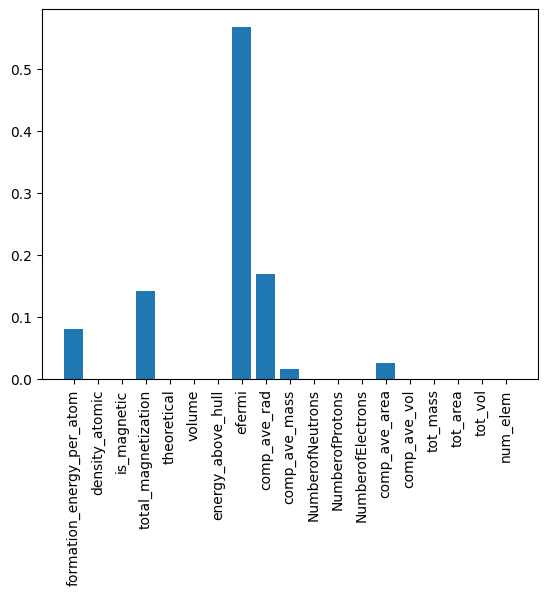

In [121]:
from matplotlib import pyplot
print(model.feature_importances_)
faut_arr = ['formation_energy_per_atom', 'density_atomic', 'is_magnetic',
       'total_magnetization', 'theoretical', 'volume', 'energy_above_hull',
       'efermi', 'comp_ave_rad', 'comp_ave_mass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'comp_ave_area', 'comp_ave_vol',
       'tot_mass', 'tot_area', 'tot_vol', 'num_elem']
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print("Feature:", faut_arr[i])
 print('Score: %.5f' % (v))
# plot feature importance
pyplot.bar([i for i in range(len(importance))], importance)
y_pos = range(len(importance))
# Rotation of the bars names
plt.xticks(y_pos, faut_arr, rotation=90)
pyplot.show()


Similar feature importance here. Unsurpsingly, number of elements does not matter as these are all binary only. But now, amny features are of negligable importance

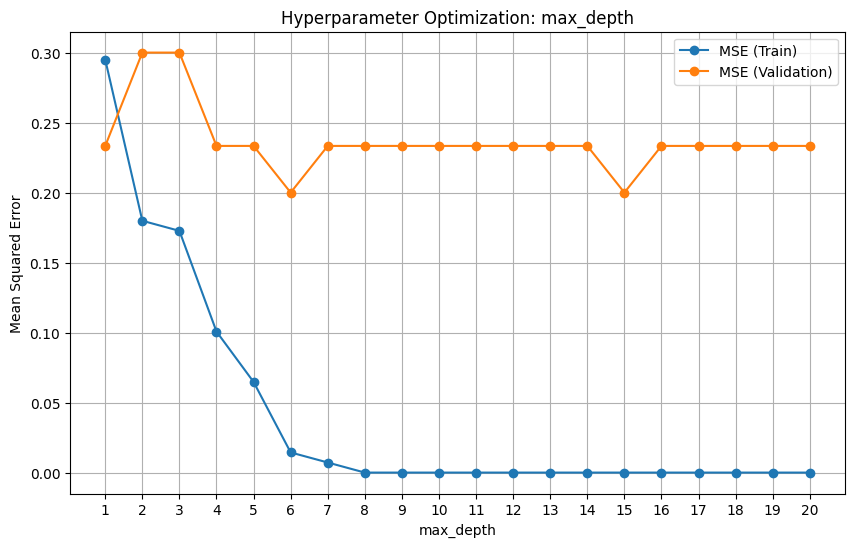

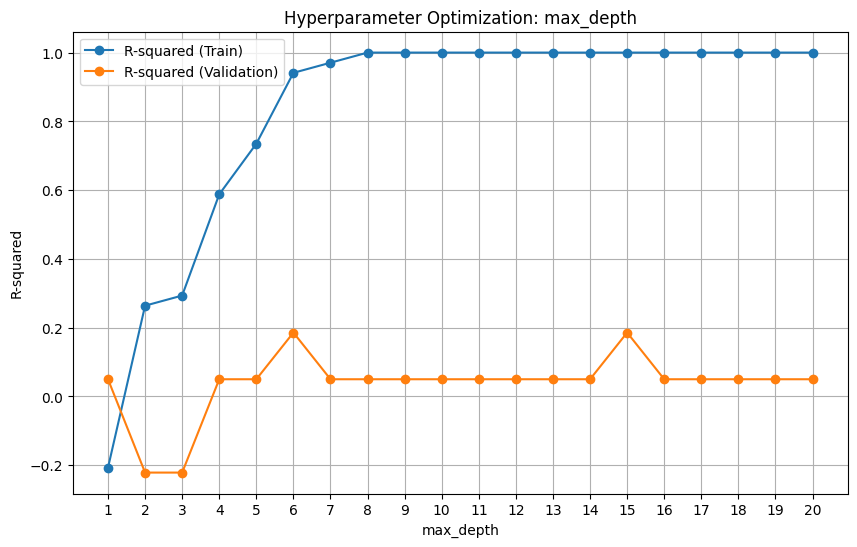

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test_val, y_train, y_test_val = train_test_split(
    x_metal_3, y_metal_3, test_size=0.30, random_state=4)


X_test, X_val, y_test, y_val = train_test_split(
     X_test_val, y_test_val, test_size=0.50, random_state=60)

# Define a range of max_depth values to try
max_depth_values = range(1, 21)
# Initialize lists to store MSE and R-squared values for train, validation, and test sets
mse_train_values = []
r2_train_values = []
mse_val_values = []
r2_val_values = []
# Hyperparameter optimization loop
for max_depth in max_depth_values:
    # Create and train the decision tree regression model
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    # Make predictions on the train set
    y_train_pred = model.predict(X_train)
    # Compute MSE and R-squared for train set
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)
    # Compute MSE and R-squared for validation set
    mse_val = mean_squared_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)
    # Append the results to the lists
    mse_train_values.append(mse_train)
    r2_train_values.append(r2_train)
    mse_val_values.append(mse_val)
    r2_val_values.append(r2_val)
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mse_train_values, 'o-', label='MSE (Train)')
plt.plot(max_depth_values, mse_val_values, 'o-', label='MSE (Validation)')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_train_values, 'o-', label='R-squared (Train)')
plt.plot(max_depth_values, r2_val_values, 'o-', label='R-squared (Validation)')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

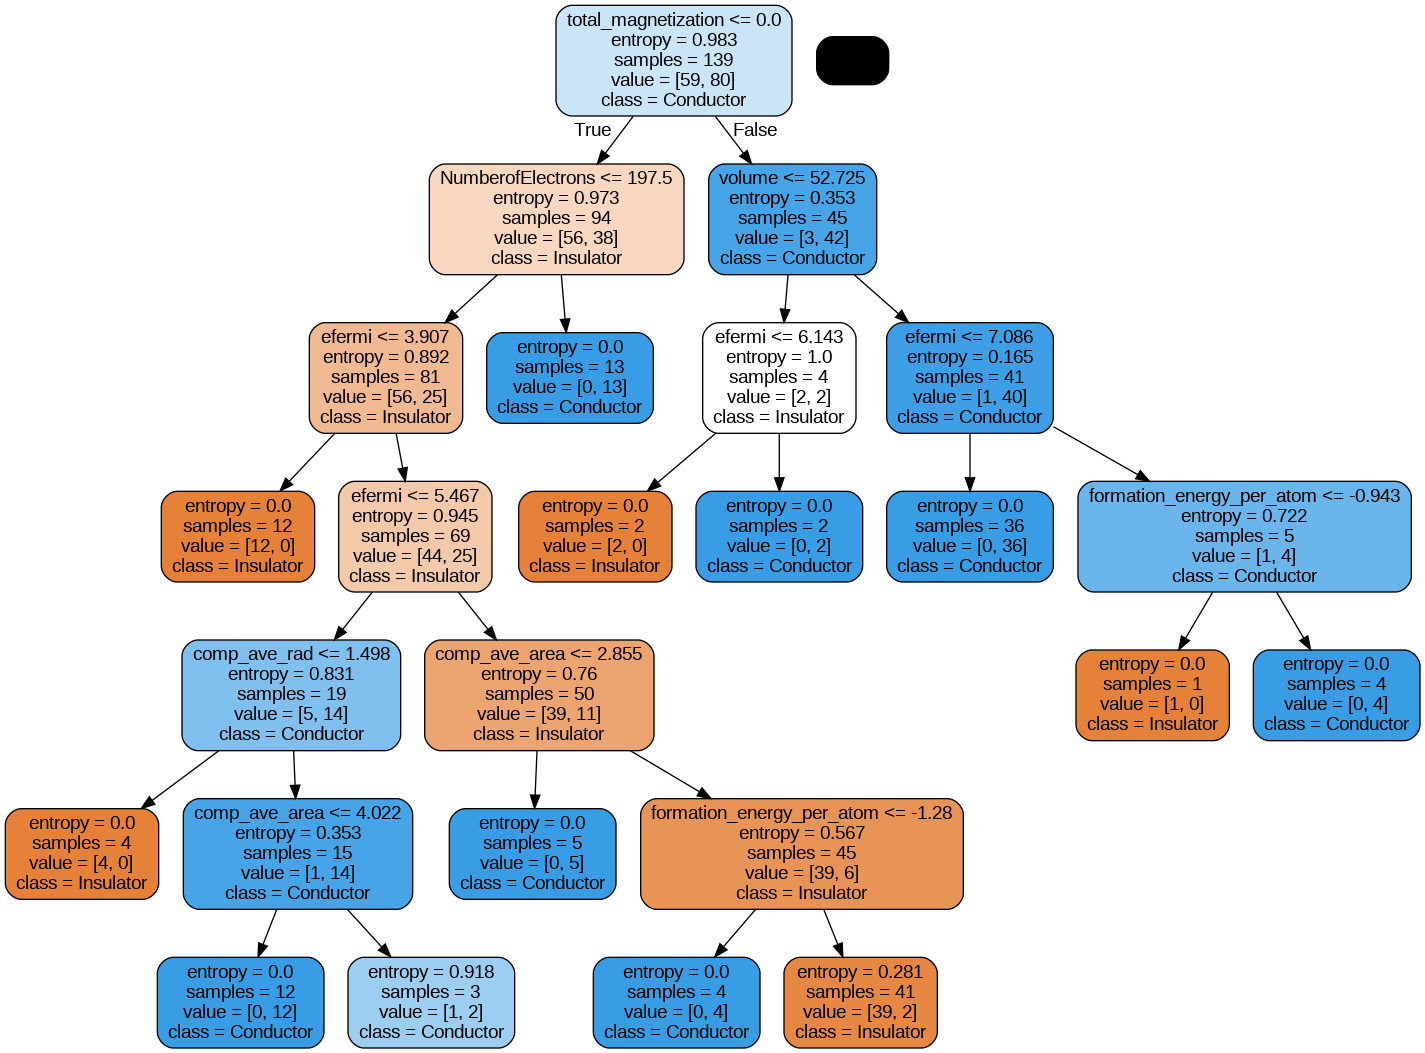

In [123]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
# Create a model and train it
model = DecisionTreeClassifier(criterion="entropy", max_depth=6)
model.fit(X_train, y_train)
# Export the decision tree to a dot file
dot_data = export_graphviz(model, out_file=None, feature_names=x_metal_3.columns.tolist(), class_names=['Insulator','Conductor'], filled=True, rounded=True)
# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)
# Display the decision tree using Image class
Image(graph.create_png())

In [124]:
y_test_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_test_pred))
print(accuracy_score(y_test, y_test_pred))
#print(model.feature_importances_)

[[ 9  2]
 [ 4 15]]
0.8


[0.14355331 0.         0.         0.23936865 0.         0.04181271
 0.         0.20900427 0.08575173 0.         0.         0.
 0.15748123 0.12302809 0.         0.         0.         0.
 0.        ]
Feature: formation_energy_per_atom
Score: 0.14355
Feature: density_atomic
Score: 0.00000
Feature: is_magnetic
Score: 0.00000
Feature: total_magnetization
Score: 0.23937
Feature: theoretical
Score: 0.00000
Feature: volume
Score: 0.04181
Feature: energy_above_hull
Score: 0.00000
Feature: efermi
Score: 0.20900
Feature: comp_ave_rad
Score: 0.08575
Feature: comp_ave_mass
Score: 0.00000
Feature: NumberofNeutrons
Score: 0.00000
Feature: NumberofProtons
Score: 0.00000
Feature: NumberofElectrons
Score: 0.15748
Feature: comp_ave_area
Score: 0.12303
Feature: comp_ave_vol
Score: 0.00000
Feature: tot_mass
Score: 0.00000
Feature: tot_area
Score: 0.00000
Feature: tot_vol
Score: 0.00000
Feature: num_elem
Score: 0.00000


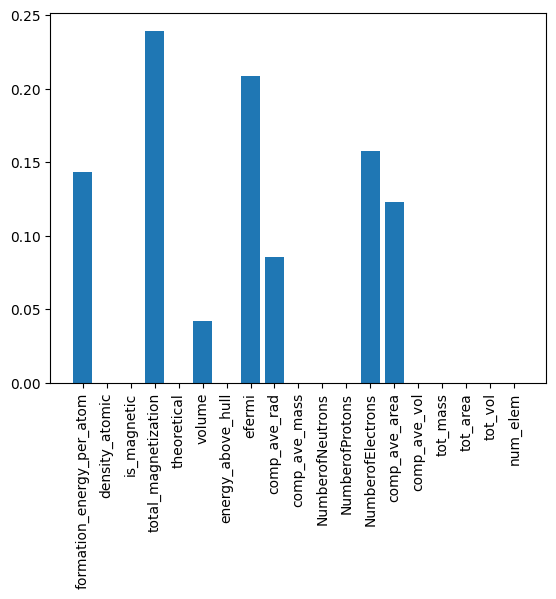

In [125]:
from matplotlib import pyplot
print(model.feature_importances_)
faut_arr = ['formation_energy_per_atom', 'density_atomic', 'is_magnetic',
       'total_magnetization', 'theoretical', 'volume', 'energy_above_hull',
       'efermi', 'comp_ave_rad', 'comp_ave_mass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'comp_ave_area', 'comp_ave_vol',
       'tot_mass', 'tot_area', 'tot_vol', 'num_elem']
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print("Feature:", faut_arr[i])
 print('Score: %.5f' % (v))
# plot feature importance
pyplot.bar([i for i in range(len(importance))], importance)
y_pos = range(len(importance))
# Rotation of the bars names
plt.xticks(y_pos, faut_arr, rotation=90)
pyplot.show()


For ternery compounds, we get a lower accuracy mdoel of only 80%, but this model also relies on a smaller data set. Interestly, compostion averaged radius is far less important now, with other factor such as various energy coniderations and now the composition averaged radius^2 becoming more important.